# Deciphering Crypto Trends: Google Trends Analysis and Predictive Modeling

Participants are asked to analyze Google Trends data and apply predictive modeling techniques to examine cryptocurrency market dynamics. They extract valuable insights on the interplay between Google Trends metrics and the valuation of crypto tokens. Integrating supplementary datasets, performing EDAs, and leveraging advanced ML methodologies, participants will discern correlations, forecast trends, and situate contemporary market phenomena within the framework of historical cycles.

In [1]:
import pandas as pd
import numpy as np
import os
import datetime
from datetime import datetime

import webbrowser
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode()

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)

In [2]:
import warnings as wr
wr.filterwarnings('ignore')

In [3]:
'''
from IPython import display

#import functions
import plotting

from datetime import datetime,date

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.metrics import mean_squared_error
from keras.layers.recurrent import LSTM
''' 

'\nfrom IPython import display\n\n#import functions\nimport plotting\n\nfrom datetime import datetime,date\n\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_absolute_error\nfrom keras.models import Sequential\nfrom keras.layers.core import Dense, Activation, Dropout\nfrom keras.metrics import mean_squared_error\nfrom keras.layers.recurrent import LSTM\n'

In [4]:
import glob

# Retrieving all .csv files under price directory
csv_files = glob.glob('prices/*.csv')

# Create an empty dataframe to store the combined data
combined_df = pd.DataFrame()

# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    combined_df = pd.concat([combined_df, df])

# Print the combined dataframe
print(combined_df)

            Date       Open       High        Low      Close  Adj Close  \
0     2019-03-02   0.404491   0.407747   0.404491   0.407747   0.407747   
1     2019-03-03   0.406001   0.430755   0.359836   0.362715   0.362715   
2     2019-03-04   0.365171   0.380692   0.330939   0.335099   0.335099   
3     2019-03-05   0.334552   0.344817   0.311725   0.321447   0.321447   
4     2019-03-06   0.316966   0.331671   0.311370   0.313599   0.313599   
...          ...        ...        ...        ...        ...        ...   
2339  2024-04-05  10.737855  10.753172  10.253148  10.461000  10.461000   
2340  2024-04-06  10.461000  10.527088  10.260750  10.348476  10.348476   
2341  2024-04-07  10.348476  10.437800  10.285212  10.380551  10.380551   
2342  2024-04-08  10.380551  10.619534  10.337043  10.393996  10.393996   
2343  2024-04-09  10.391194  10.509649  10.265285  10.342656  10.342656   

        Volume  
0     42849638  
1     32899379  
2     37723984  
3     38616986  
4     19068167

## Autoviz: First crack at generating some visualizations before cleaning the data
The autoviz package enables instant visualization generation. I'm 99.9% it will be hard to draw insights from this before the data is cleaned but for research purposes I'm seeing what this glob outputs before in-depth analysis. Wish me luck

In [5]:
#!pip uninstall sweetviz


In [6]:
#!pip install sweetviz

In [7]:
# Creating a conglomerate of data vizzes
'''
import sweetviz as sv
analyze_report = sv.analyze(combined_df)
analyze_report.show_html('report.html', open_browser=False)
'''

"\nimport sweetviz as sv\nanalyze_report = sv.analyze(combined_df)\nanalyze_report.show_html('report.html', open_browser=False)\n"

In [8]:
# Assign dataset names
list_of_names = ['ADA-USD','AGIX-USD','BNB-USD','BTC-USD','CAKE-USD',
                'DOGE-USD','DOT-USD','ETH-USD','FET-USD','FIL-USD',
                'KCS-USD','LINK-USD','LTC-USD','OCEAN-USD','ROSE-USD',
                'SOL-USD','UNI-USD','XMR-USD','XRP-USD','XTZ-USD']

dataframes_list = []
cleaned_list = []

# Loop through all the .csv files in the prices folder
for i in range(len(list_of_names)):
    temp_df = pd.read_csv("prices/"+list_of_names[i]+".csv")
    # cleaned_list = temp_df
    # cleaned_list[i] = list_of_names[i].replace('-','_')
    # cleaned_list[i][0]["Date"][0][:4]
    dataframes_list.append(temp_df)
    
    #.append(clean_list[i])

In [9]:
dataframes_list # List of all dataframes

[            Date      Open      High       Low     Close  Adj Close     Volume
 0     2017-11-09  0.025160  0.035060  0.025006  0.032053   0.032053   18716200
 1     2017-11-10  0.032219  0.033348  0.026451  0.027119   0.027119    6766780
 2     2017-11-11  0.026891  0.029659  0.025684  0.027437   0.027437    5532220
 3     2017-11-12  0.027480  0.027952  0.022591  0.023977   0.023977    7280250
 4     2017-11-13  0.024364  0.026300  0.023495  0.025808   0.025808    4419440
 ...          ...       ...       ...       ...       ...        ...        ...
 2339  2024-04-05  0.582955  0.584300  0.562024  0.574834   0.574834  449048347
 2340  2024-04-06  0.574841  0.588323  0.573283  0.584338   0.584338  255666150
 2341  2024-04-07  0.584379  0.595882  0.582689  0.589474   0.589474  307767311
 2342  2024-04-08  0.589472  0.615812  0.580352  0.614159   0.614159  442630355
 2343  2024-04-09  0.614165  0.622483  0.595174  0.605372   0.605372  500568992
 
 [2344 rows x 7 columns],
            

In [10]:
temp_df # DataFrame of all token datasets

# Both dataframes_list and temp_df reflect the same amount of 
# records/items [2344 rows x 7 columns] which means the conversions were successful!

Date      Open      High       Low     Close  Adj Close    Volume
0     2017-11-09  1.618220  1.770870  1.561080  1.706310   1.706310    506992
1     2017-11-10  1.725750  1.788160  1.506240  1.556840   1.556840    507916
2     2017-11-11  1.550430  1.629680  1.506630  1.583380   1.583380    500045
3     2017-11-12  1.579000  1.603630  1.442530  1.476480   1.476480    278535
4     2017-11-13  1.504680  1.564480  1.400590  1.459460   1.459460    390003
...          ...       ...       ...       ...       ...        ...       ...
2339  2024-04-05  1.269113  1.273840  1.204819  1.251027   1.251027  26748677
2340  2024-04-06  1.251027  1.272548  1.246724  1.264770   1.264770  21607076
2341  2024-04-07  1.264770  1.280071  1.254464  1.270837   1.270837  20876214
2342  2024-04-08  1.270837  1.330830  1.246086  1.327626   1.327626  29257603
2343  2024-04-09  1.327743  1.333777  1.271988  1.289236   1.289236  33745936

[2344 rows x 7 columns]

In [11]:
dataframes_list[0]["Date"]

0       2017-11-09
1       2017-11-10
2       2017-11-11
3       2017-11-12
4       2017-11-13
           ...    
2339    2024-04-05
2340    2024-04-06
2341    2024-04-07
2342    2024-04-08
2343    2024-04-09
Name: Date, Length: 2344, dtype: object

In [12]:
#temp_df['Year'] = temp_df['Date'].dt.year

In [13]:
temp_df

Date      Open      High       Low     Close  Adj Close    Volume
0     2017-11-09  1.618220  1.770870  1.561080  1.706310   1.706310    506992
1     2017-11-10  1.725750  1.788160  1.506240  1.556840   1.556840    507916
2     2017-11-11  1.550430  1.629680  1.506630  1.583380   1.583380    500045
3     2017-11-12  1.579000  1.603630  1.442530  1.476480   1.476480    278535
4     2017-11-13  1.504680  1.564480  1.400590  1.459460   1.459460    390003
...          ...       ...       ...       ...       ...        ...       ...
2339  2024-04-05  1.269113  1.273840  1.204819  1.251027   1.251027  26748677
2340  2024-04-06  1.251027  1.272548  1.246724  1.264770   1.264770  21607076
2341  2024-04-07  1.264770  1.280071  1.254464  1.270837   1.270837  20876214
2342  2024-04-08  1.270837  1.330830  1.246086  1.327626   1.327626  29257603
2343  2024-04-09  1.327743  1.333777  1.271988  1.289236   1.289236  33745936

[2344 rows x 7 columns]

### EDA of temporary DataFrame comprised of all combined 20 datasets
Upon review there's a normal distribution for every column {Open, High, Low, Close, Adj Close, Volume} skewed to the right. This means that this is a positively skewed distribution. From this we can conclude that mean > median > mode. After I conduct an EDA on each token we'll be able to see if any tokens have a normal distribution so that I can possibly apply Gaussian distrubution methods.

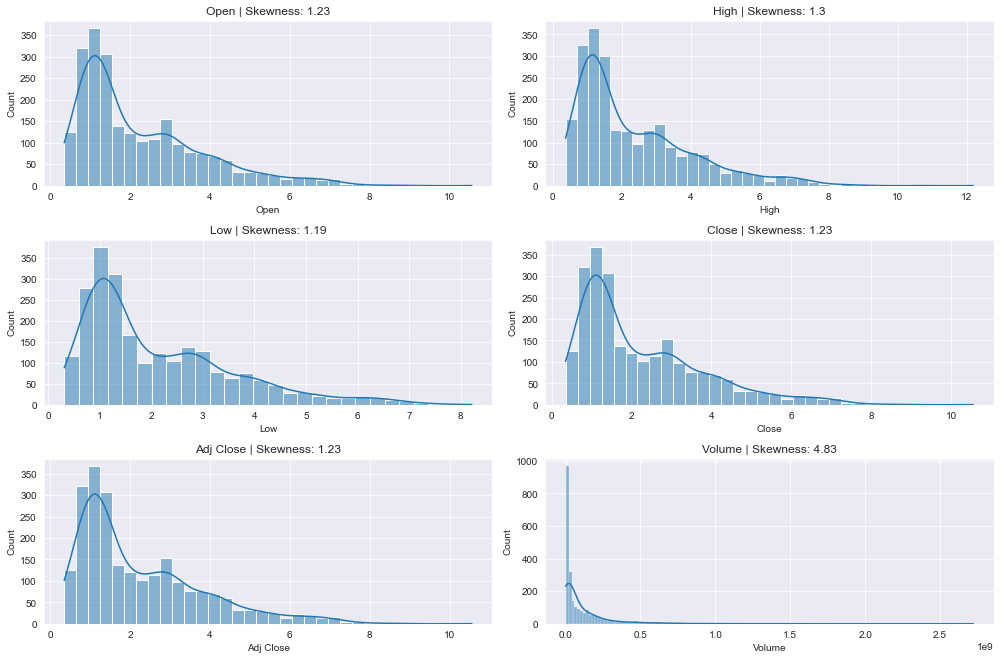

In [14]:
sns.set_style("darkgrid")
 
numerical_columns = temp_df.select_dtypes(include=["int64", "float64"]).columns
 
# plots distrubition of each column
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(temp_df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(temp_df[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()

<Figure size 720x432 with 0 Axes>

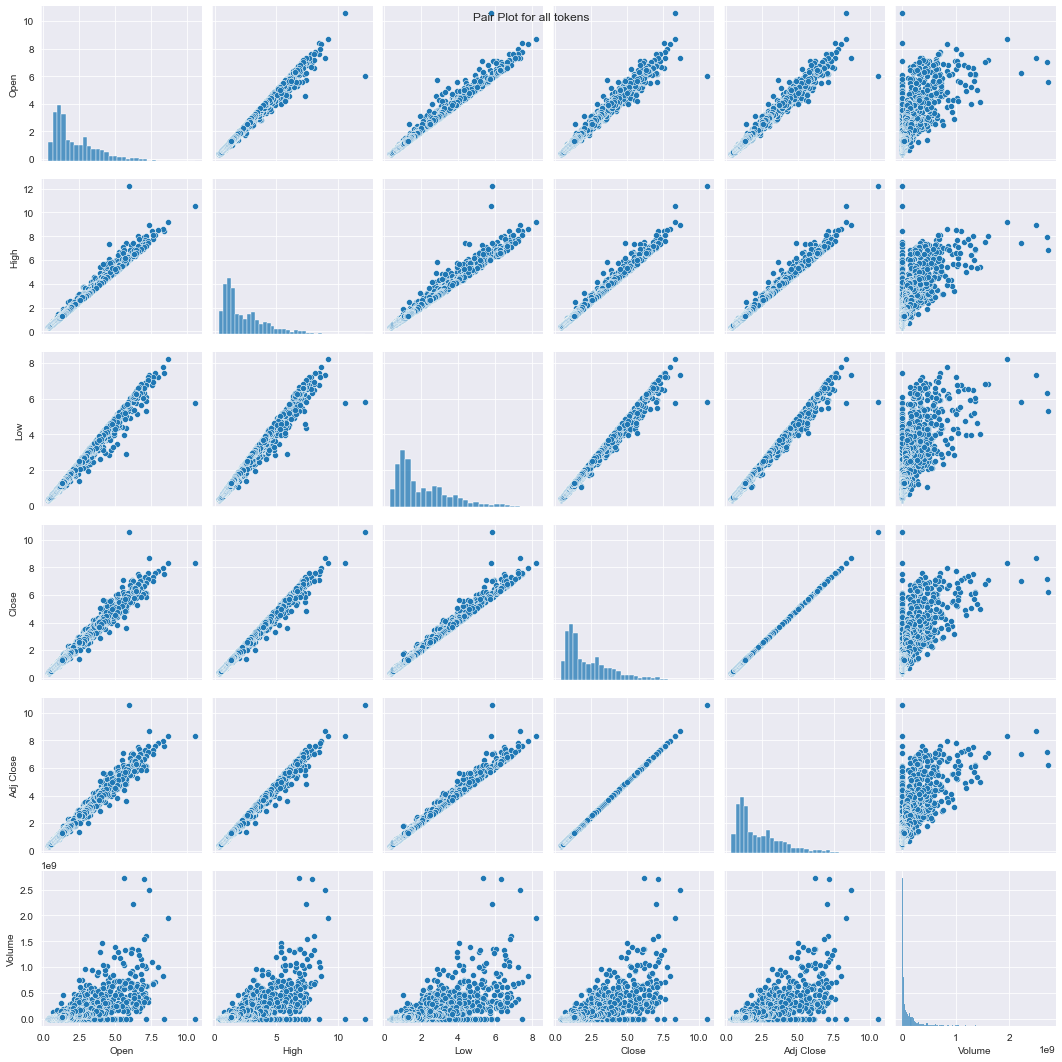

In [15]:
plt.figure(figsize=(10, 6))
 
sns.pairplot(temp_df)
 
plt.suptitle('Pair Plot for all tokens')
plt.show()

In [16]:
temp_df.head()

Date     Open     High      Low    Close  Adj Close  Volume
0  2017-11-09  1.61822  1.77087  1.56108  1.70631    1.70631  506992
1  2017-11-10  1.72575  1.78816  1.50624  1.55684    1.55684  507916
2  2017-11-11  1.55043  1.62968  1.50663  1.58338    1.58338  500045
3  2017-11-12  1.57900  1.60363  1.44253  1.47648    1.47648  278535
4  2017-11-13  1.50468  1.56448  1.40059  1.45946    1.45946  390003

In [17]:
temp_df.columns.tolist() # Lists all column names in dataframe

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [18]:
cleaned_list

[]

In [19]:
len(list_of_names)

20

In [20]:
temp_df.head() # Top 5 records in dataframe

Date     Open     High      Low    Close  Adj Close  Volume
0  2017-11-09  1.61822  1.77087  1.56108  1.70631    1.70631  506992
1  2017-11-10  1.72575  1.78816  1.50624  1.55684    1.55684  507916
2  2017-11-11  1.55043  1.62968  1.50663  1.58338    1.58338  500045
3  2017-11-12  1.57900  1.60363  1.44253  1.47648    1.47648  278535
4  2017-11-13  1.50468  1.56448  1.40059  1.45946    1.45946  390003

In [21]:
temp_df.tail() # Last 5 records in dataframe

Date      Open      High       Low     Close  Adj Close    Volume
2339  2024-04-05  1.269113  1.273840  1.204819  1.251027   1.251027  26748677
2340  2024-04-06  1.251027  1.272548  1.246724  1.264770   1.264770  21607076
2341  2024-04-07  1.264770  1.280071  1.254464  1.270837   1.270837  20876214
2342  2024-04-08  1.270837  1.330830  1.246086  1.327626   1.327626  29257603
2343  2024-04-09  1.327743  1.333777  1.271988  1.289236   1.289236  33745936

In [22]:
# Name dataframes from index 0 - 19 (20 items)
ADA_USD = dataframes_list[0]
AGIX_USD = dataframes_list[1]
BNB_USD = dataframes_list[2]
BTC_USD = dataframes_list[3]
CAKE_USD = dataframes_list[4]

DOGE_USD = dataframes_list[5]
DOT_USD = dataframes_list[6]
ETH_USD = dataframes_list[7]
FET_USD = dataframes_list[8]
FIL_USD = dataframes_list[9]

KCS_USD = dataframes_list[10]
LINK_USD = dataframes_list[11]
LTC_USD = dataframes_list[12]
OCEAN_USD = dataframes_list[13]
ROSE_USD = dataframes_list[14]

SOL_USD = dataframes_list[15]
UNI_USD = dataframes_list[16]
XMR_USD = dataframes_list[17]
XRP_USD = dataframes_list[18]
XTZ_USD = dataframes_list[19]

In [23]:
# Extracting only year that will be using in for loop above
ADA_USD["Date"][0][:4]

'2017'

In [24]:
ADA_USD.describe()

Open         High          Low        Close    Adj Close  \
count  2344.000000  2344.000000  2344.000000  2344.000000  2344.000000   
mean      0.472135     0.491269     0.451802     0.472380     0.472380   
std       0.563218     0.587330     0.537526     0.563218     0.563218   
min       0.023954     0.025993     0.019130     0.023961     0.023961   
25%       0.080990     0.083648     0.077933     0.081065     0.081065   
50%       0.286822     0.293694     0.274966     0.287002     0.287002   
75%       0.559968     0.592787     0.536307     0.560791     0.560791   
max       2.966390     3.099186     2.907606     2.968239     2.968239   

             Volume  
count  2.344000e+03  
mean   9.958598e+08  
std    1.861149e+09  
min    2.930550e+06  
25%    9.746293e+07  
50%    2.973295e+08  
75%    9.249956e+08  
max    1.914198e+10

In [25]:
BNB_USD.describe()

Open         High          Low        Close    Adj Close  \
count  2344.000000  2344.000000  2344.000000  2344.000000  2344.000000   
mean    176.605695   181.679618   171.280731   176.825163   176.825163   
std     178.808457   184.231471   172.969669   178.905690   178.905690   
min       1.511360     1.582660     1.462560     1.510360     1.510360   
25%      15.754719    16.226605    15.349200    15.762416    15.762416   
50%      42.634487    44.064598    40.912648    42.818941    42.818941   
75%     307.762917   314.271644   301.605660   307.887016   307.887016   
max     676.315918   690.931946   634.549500   675.684082   675.684082   

             Volume  
count  2.344000e+03  
mean   9.422329e+08  
std    1.331893e+09  
min    9.284000e+03  
25%    1.880614e+08  
50%    4.378213e+08  
75%    1.246945e+09  
max    1.798295e+10

## Cardano Price Analysis, Performance, and Predictive Analytics


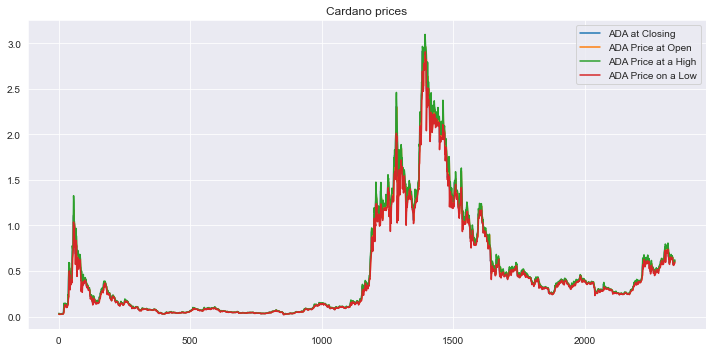

In [26]:
sns.set_style("darkgrid")
ADA_USD["Close"].plot(label = 'ADA at Closing', figsize = (10,5))
ADA_USD["Open"].plot(label = 'ADA Price at Open')
ADA_USD["High"].plot(label = 'ADA Price at a High')
ADA_USD["Low"].plot(label = 'ADA Price on a Low')
plt.legend()

plt.title('Cardano prices')
plt.show
plt.tight_layout()

### Exploratory Data Analysis of Cardano

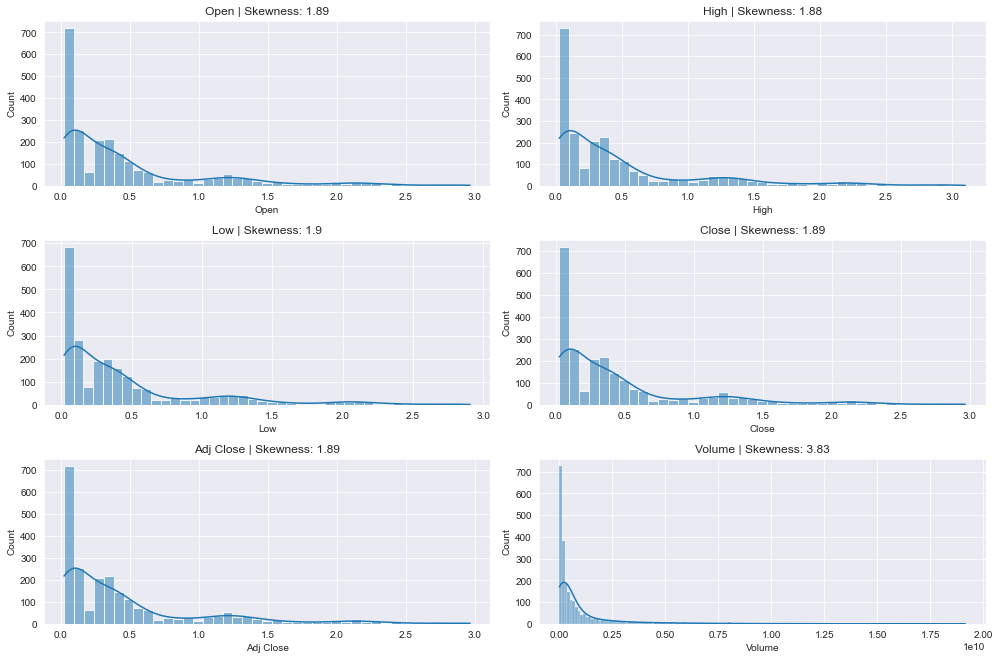

In [27]:
 numerical_columns = ADA_USD.select_dtypes(include=["int64", "float64"]).columns
 
# plots distrubition of each column
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(ADA_USD[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(ADA_USD[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()

### Swarm plot for Cardano Open Price vs. Volume

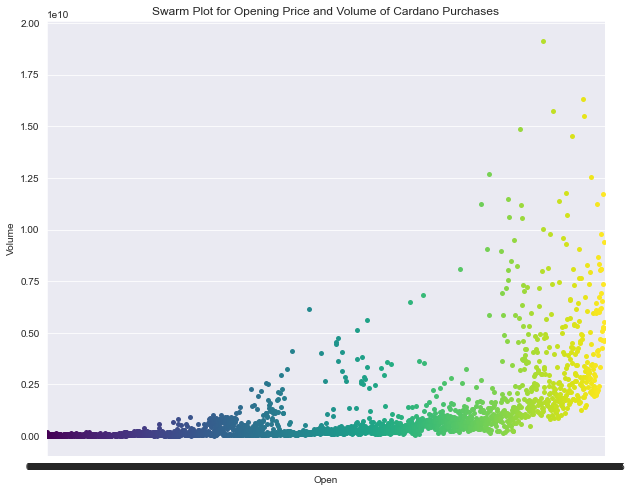

In [28]:
plt.figure(figsize=(10, 8))

sns.swarmplot(x="Open", y="Volume", data=ADA_USD, palette='viridis')
 
plt.title('Swarm Plot for Opening Price and Volume of Cardano Purchases')
plt.xlabel('Open')
plt.ylabel('Volume')
plt.show()

### Pair Plot for Cardano

<Figure size 720x432 with 0 Axes>

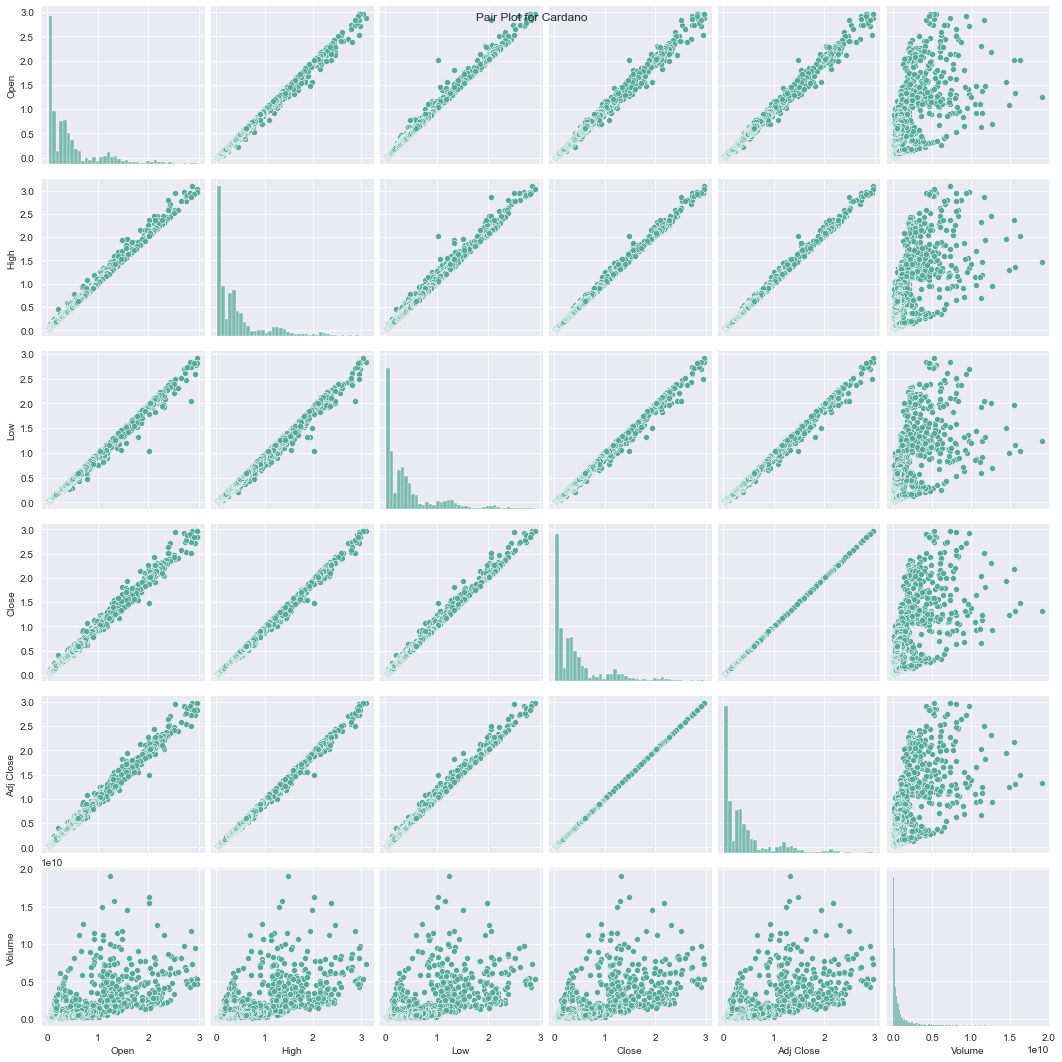

In [29]:
sns.set_palette("dark:#5A9_r")
 
plt.figure(figsize=(10, 6))
 
sns.pairplot(ADA_USD)
 
plt.suptitle('Pair Plot for Cardano')
plt.show()

## SingularityNET  Price Analysis, Performance, and Predictive Analytics

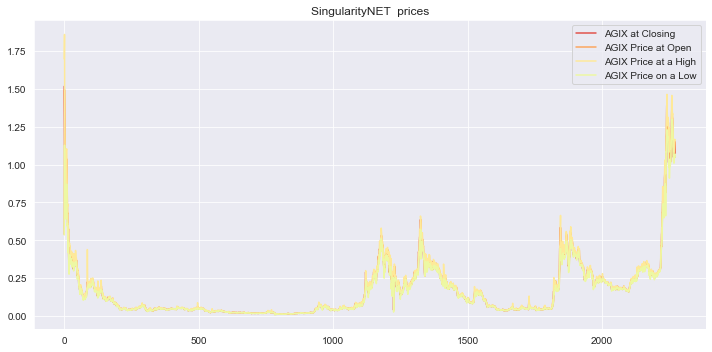

In [30]:
sns.set_style("darkgrid")

AGIX_USD["Close"].plot(label = 'AGIX at Closing', figsize = (10,5))
AGIX_USD["Open"].plot(label = 'AGIX Price at Open')
AGIX_USD["High"].plot(label = 'AGIX Price at a High')
AGIX_USD["Low"].plot(label = 'AGIX Price on a Low')
plt.legend()

plt.title('SingularityNET  prices')
plt.show
plt.tight_layout()

### Exploratory Data Analysis of SingularityNET

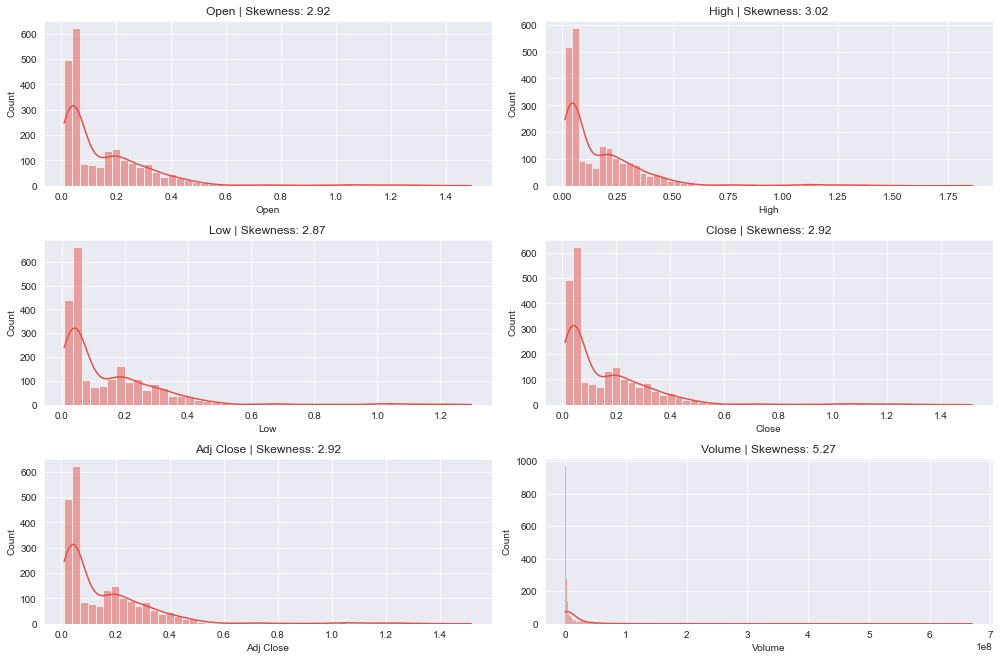

In [31]:
numerical_columns = AGIX_USD.select_dtypes(include=["int64", "float64"]).columns
 
# plots distrubition of each column
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(AGIX_USD[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(AGIX_USD[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()

### Swarm plot for AGIX Open Price vs. Volume

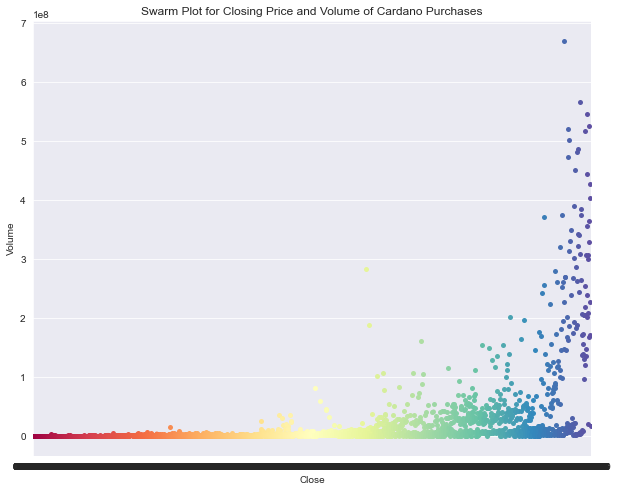

In [32]:
plt.figure(figsize=(10, 8))

sns.swarmplot(x="Close", y="Volume", data=AGIX_USD, palette='Spectral')
 
plt.title('Swarm Plot for Closing Price and Volume of Cardano Purchases')
plt.xlabel('Close')
plt.ylabel('Volume')
plt.show()

### Pair Plot for AGIX

<Figure size 720x432 with 0 Axes>

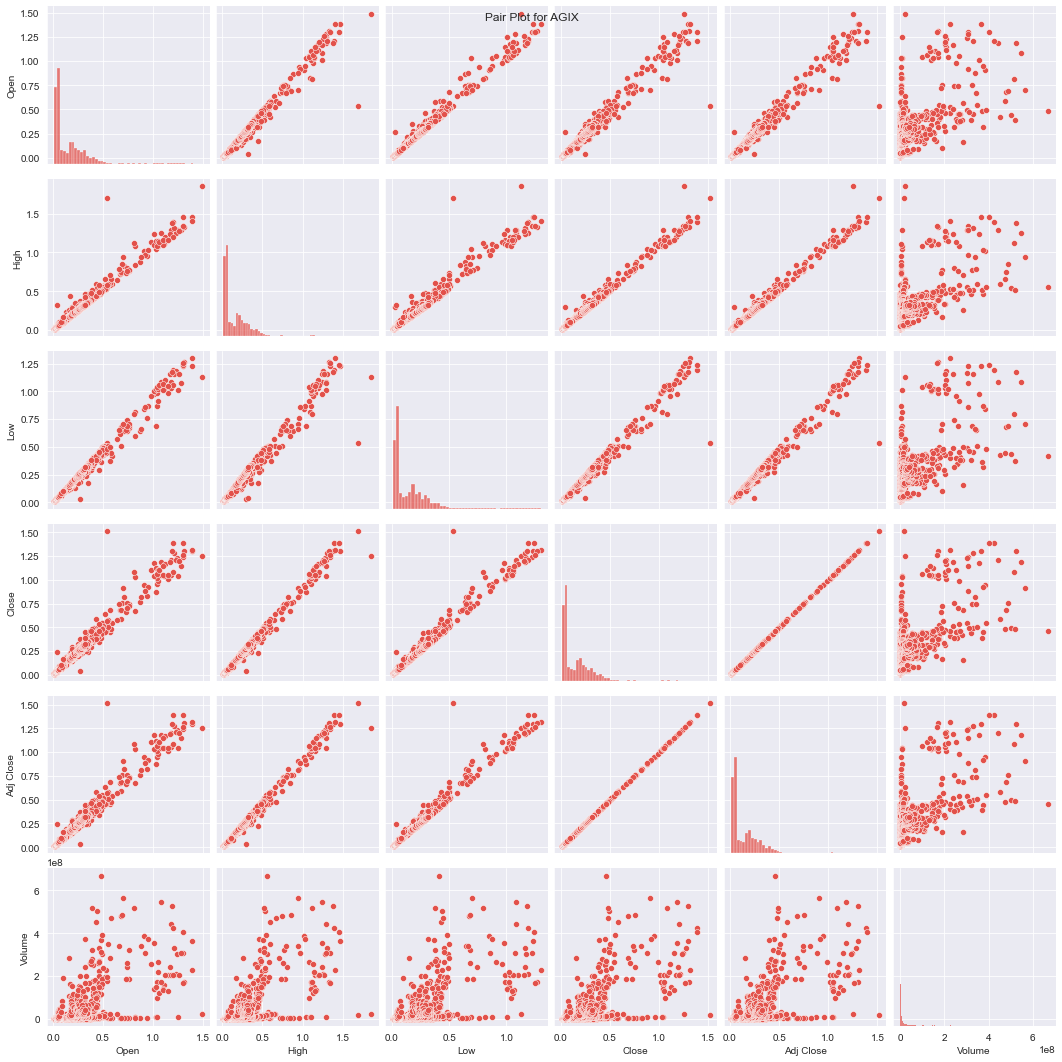

In [33]:
sns.set_palette('Spectral')
 
plt.figure(figsize=(10, 6))
 
sns.pairplot(AGIX_USD)
 
plt.suptitle('Pair Plot for AGIX')
plt.show()

## BNB Price Analysis, Performance, and Predictive Analytics

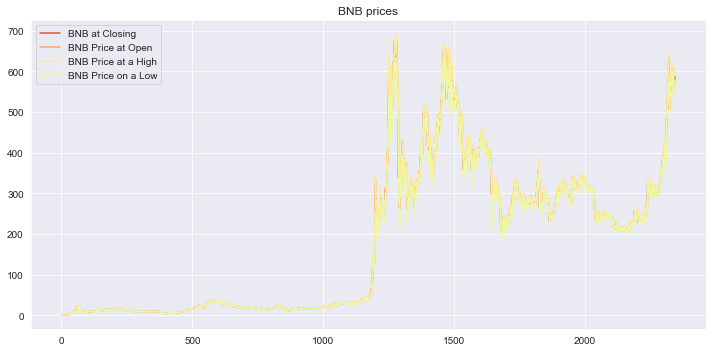

In [34]:

BNB_USD["Close"].plot(label = 'BNB at Closing', figsize = (10,5))
BNB_USD["Open"].plot(label = 'BNB Price at Open')
BNB_USD["High"].plot(label = 'BNB Price at a High')
BNB_USD["Low"].plot(label = 'BNB Price on a Low')
plt.legend()

plt.title('BNB prices')
plt.show
plt.tight_layout()

### Exploratory Data Analysis of BNB

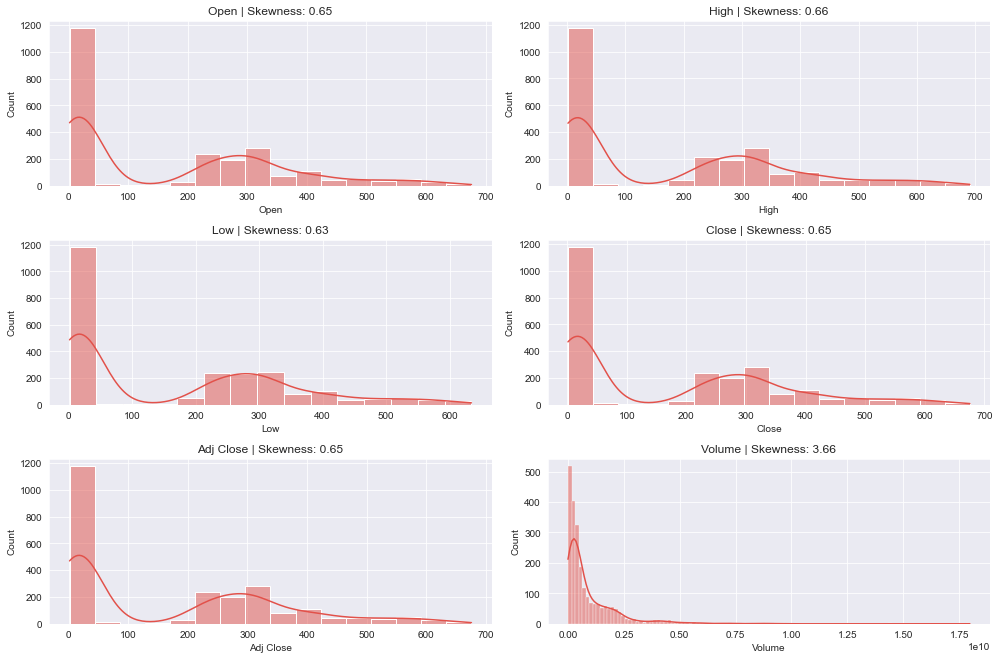

In [35]:
sns.set_style("darkgrid")
 
numerical_columns = BNB_USD.select_dtypes(include=["int64", "float64"]).columns
 
# plots distrubition of each column
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(BNB_USD[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(BNB_USD[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()

### Swarm plot for BNB Open Price vs. Volume

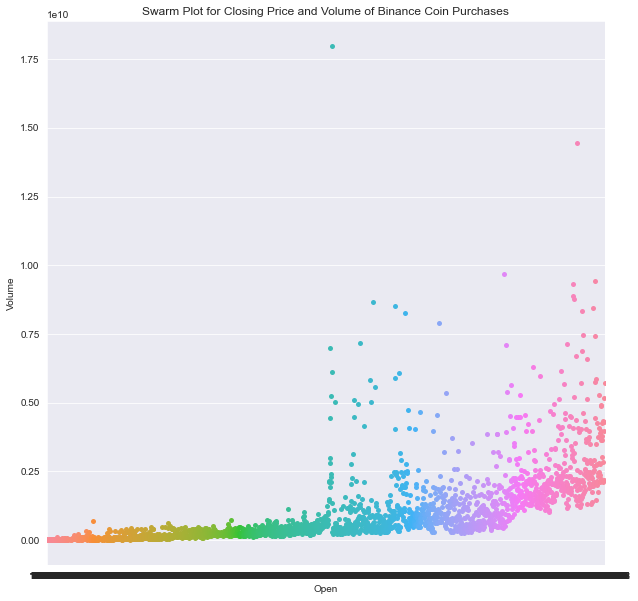

In [36]:
plt.figure(figsize=(10, 10))

sns.swarmplot(x="Open", y="Volume", data=BNB_USD)
 
plt.title('Swarm Plot for Closing Price and Volume of Binance Coin Purchases')
plt.xlabel('Open')
plt.ylabel('Volume')
plt.show()

### Pair Plot for BNB

<Figure size 720x432 with 0 Axes>

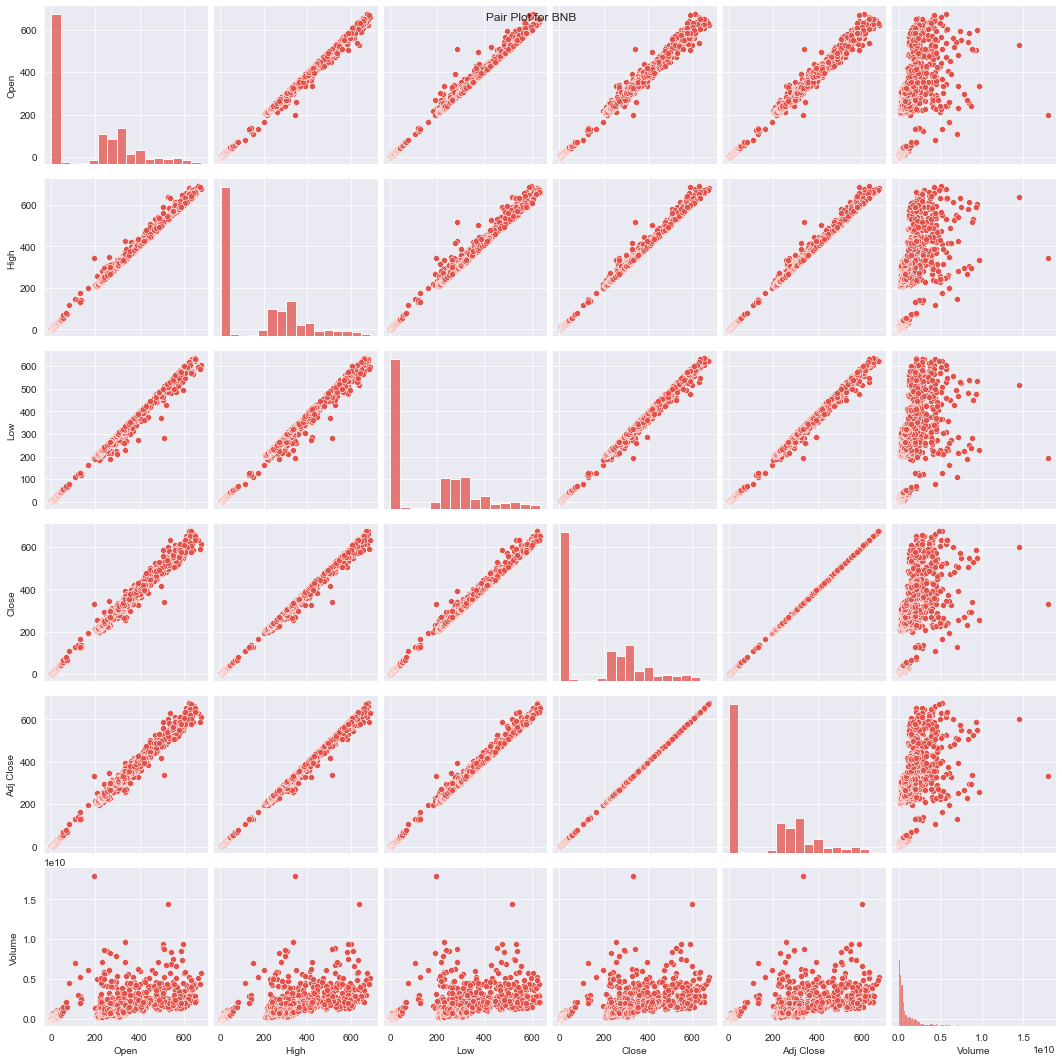

In [37]:
plt.figure(figsize=(10, 6))
 
sns.pairplot(BNB_USD)
 
plt.suptitle('Pair Plot for BNB')
plt.show()

## BTC Price Analysis, Performance, and Predictive Analytics

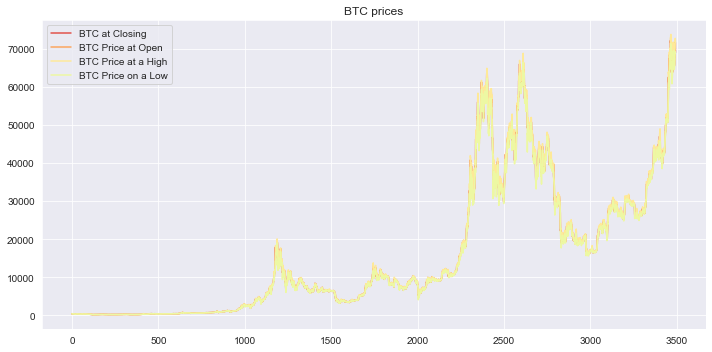

In [38]:
sns.set_style("darkgrid")

BTC_USD["Close"].plot(label = 'BTC at Closing', figsize = (10,5))
BTC_USD["Open"].plot(label = 'BTC Price at Open')
BTC_USD["High"].plot(label = 'BTC Price at a High')
BTC_USD["Low"].plot(label = 'BTC Price on a Low')
plt.legend()

plt.title('BTC prices')
plt.show
plt.tight_layout()

### Exploratory Data Analysis of Bitcoin

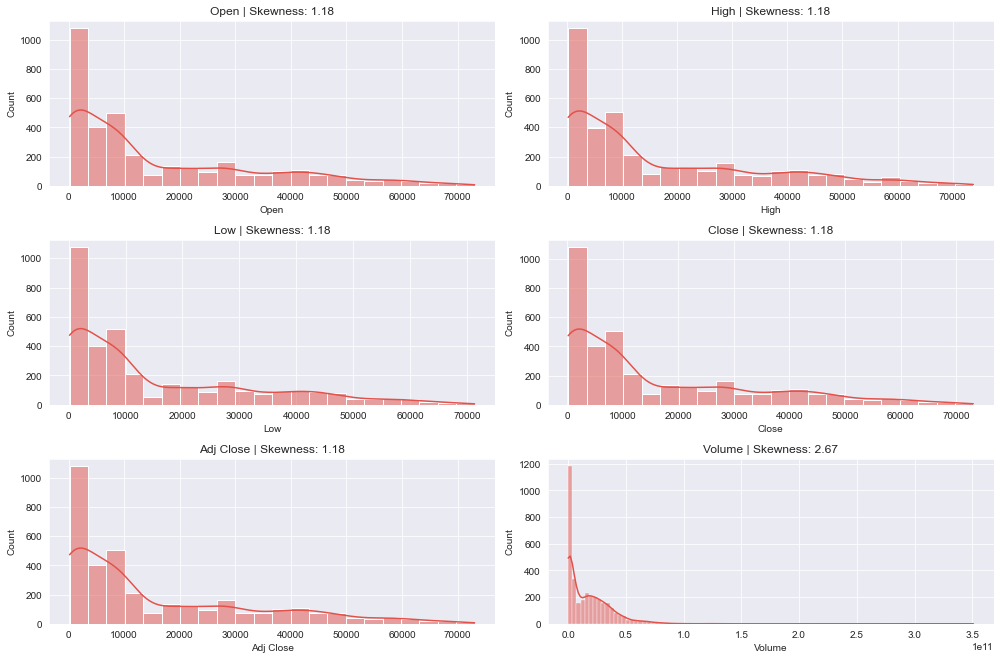

In [39]:
numerical_columns = BTC_USD.select_dtypes(include=["int64", "float64"]).columns
 
# plots distrubition of each column
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(BTC_USD[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(BTC_USD[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()

### Swarm plot for BTC Open Price vs. Volume

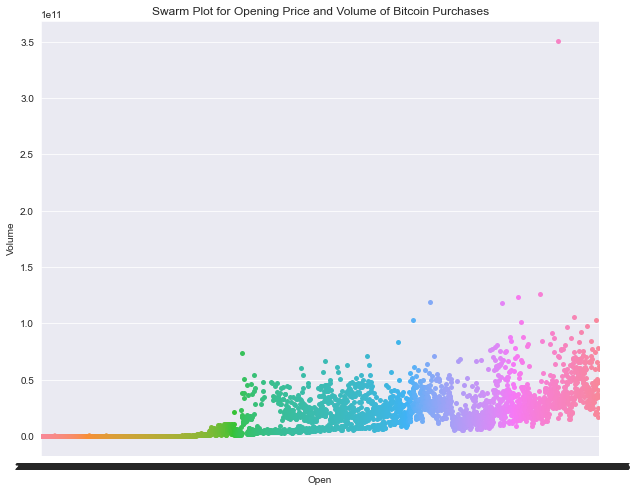

In [40]:
plt.figure(figsize=(10, 8))

sns.swarmplot(x="Open", y="Volume", data=BTC_USD)
 
plt.title('Swarm Plot for Opening Price and Volume of Bitcoin Purchases')
plt.xlabel('Open')
plt.ylabel('Volume')
plt.show()

### Pair Plot for Bitcoin

<Figure size 720x432 with 0 Axes>

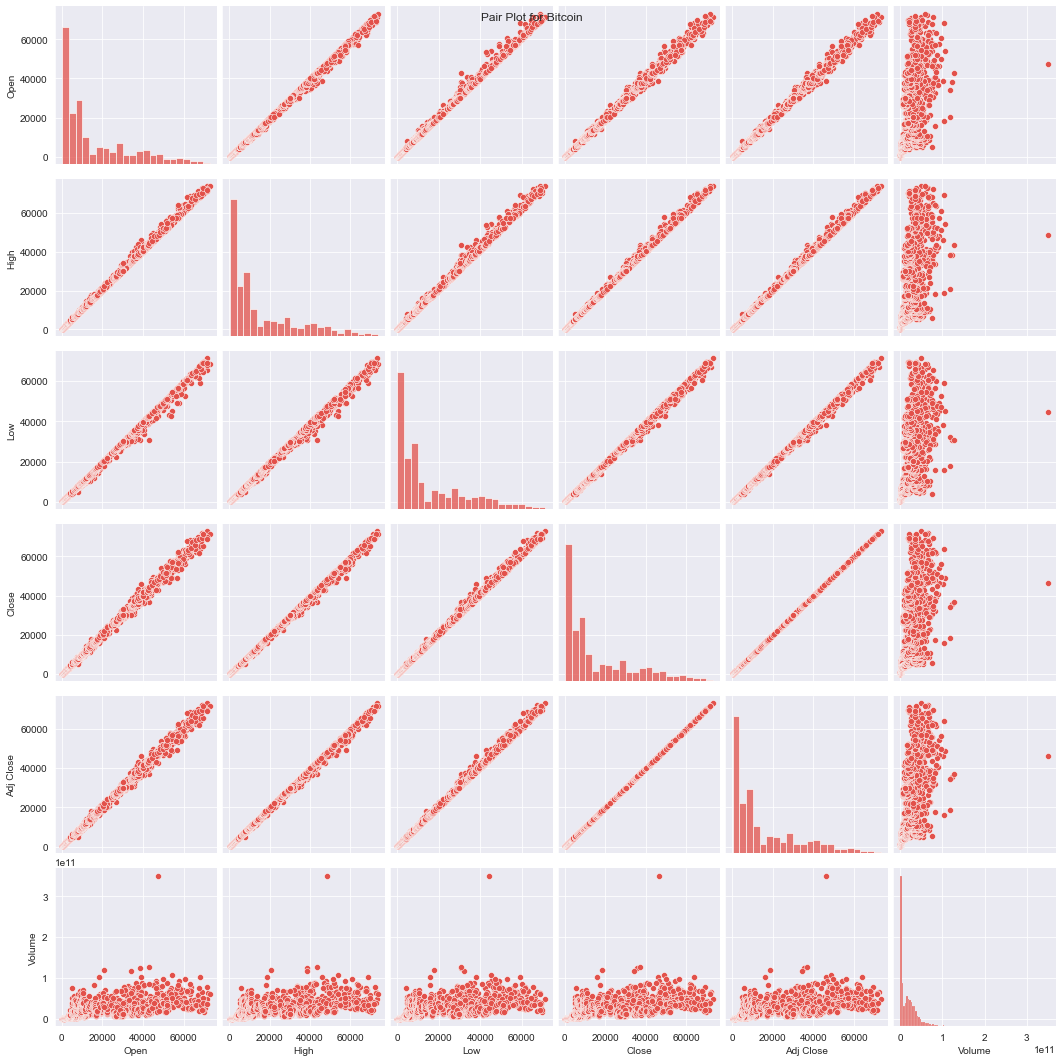

In [41]:
plt.figure(figsize=(10, 6))
 
sns.pairplot(BTC_USD)
 
plt.suptitle('Pair Plot for Bitcoin')
plt.show()

### Correlation Plot for BTC

<AxesSubplot:>

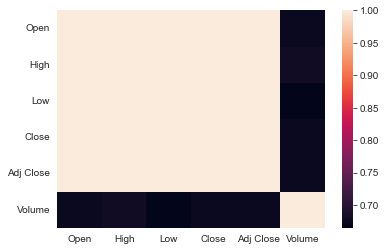

In [42]:
#Correlation plot
# Can't devise much from this graph, let's try another method
sns.heatmap(BTC_USD.corr())

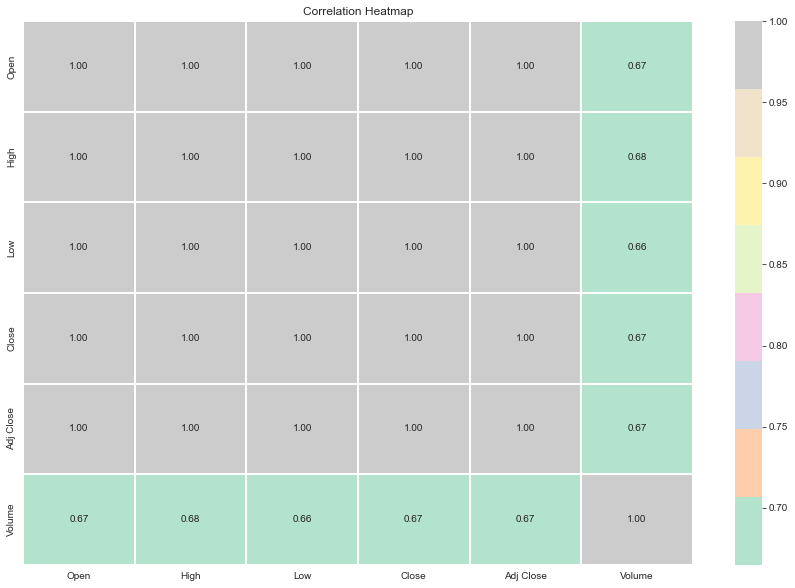

In [43]:
plt.figure(figsize=(15, 10))
 
sns.heatmap(BTC_USD.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
 
plt.title('Correlation Heatmap')
plt.show()

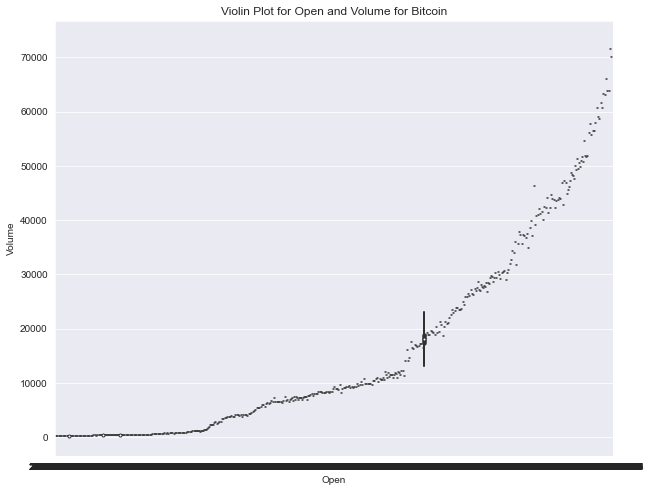

In [44]:
plt.figure(figsize=(10, 8))
 
# Using Seaborn to create a violin plot
sns.violinplot(x="Open", y="Close", data=BTC_USD, palette="Spectral")
 
plt.title('Violin Plot for Open and Volume for Bitcoin')
plt.xlabel('Open')
plt.ylabel('Volume')
plt.show()

## CAKE Price Analysis, Performance, and Predictive Analytics

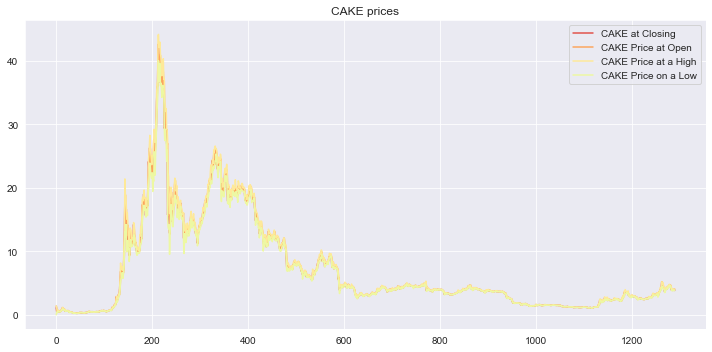

In [45]:
sns.set_style("darkgrid")
sns.color_palette("magma", as_cmap=True)

CAKE_USD["Close"].plot(label = 'CAKE at Closing', figsize = (10,5))
CAKE_USD["Open"].plot(label = 'CAKE Price at Open')
CAKE_USD["High"].plot(label = 'CAKE Price at a High')
CAKE_USD["Low"].plot(label = 'CAKE Price on a Low')
plt.legend()

plt.title('CAKE prices')
plt.show
plt.tight_layout()

### Exploratory Data Analysis of CAKE

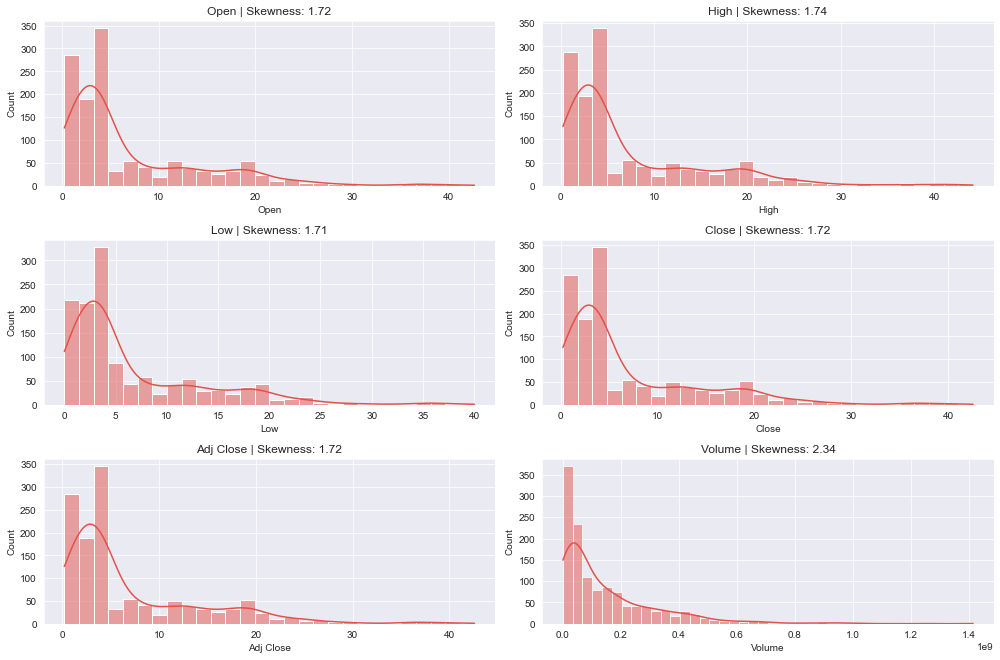

In [46]:
numerical_columns = CAKE_USD.select_dtypes(include=["int64", "float64"]).columns
 
# plots distrubition of each column
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(CAKE_USD[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(CAKE_USD[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()

### Swarm plot for CAKE Open Price vs. Volume

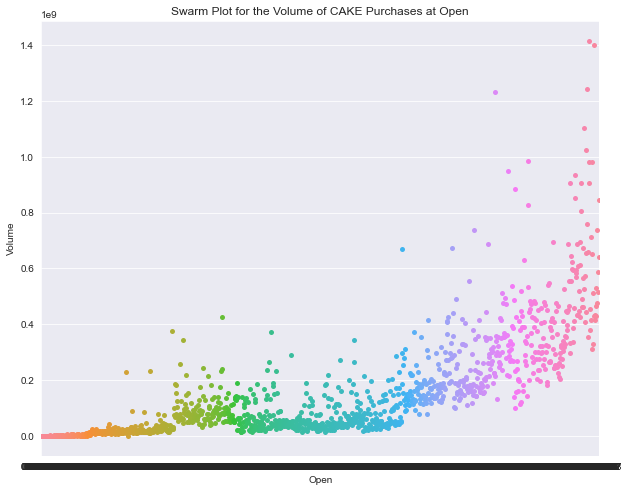

In [47]:
plt.figure(figsize=(10, 8))

sns.swarmplot(x="Open", y="Volume", data=CAKE_USD)
 
plt.title('Swarm Plot for the Volume of CAKE Purchases at Open')
plt.xlabel('Open')
plt.ylabel('Volume')
plt.show()

### Pair Plot for CAKE

<Figure size 720x432 with 0 Axes>

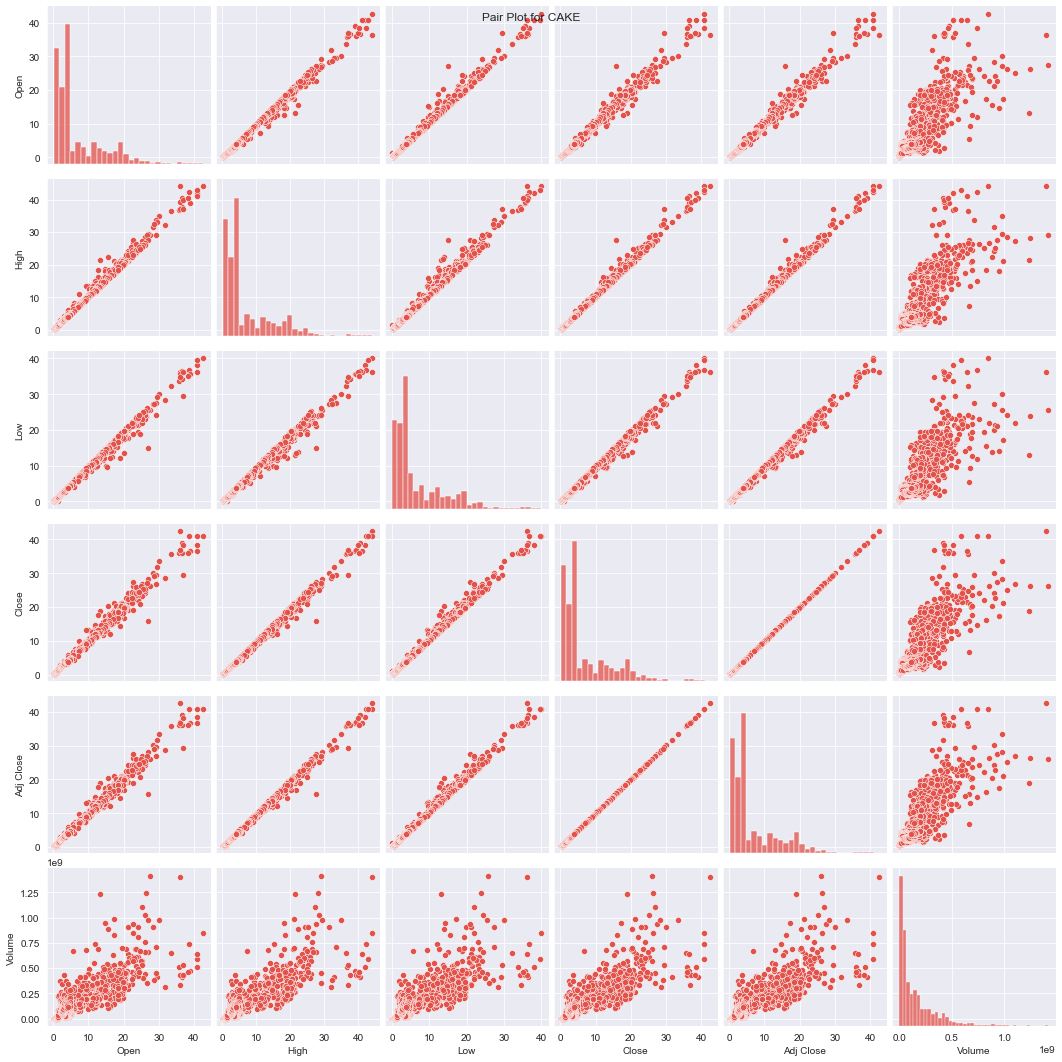

In [48]:
plt.figure(figsize=(10, 6))
 
sns.pairplot(CAKE_USD)
 
plt.suptitle('Pair Plot for CAKE')
plt.show()

## DOGE Price Analysis, Performance, and Predictive Analytics

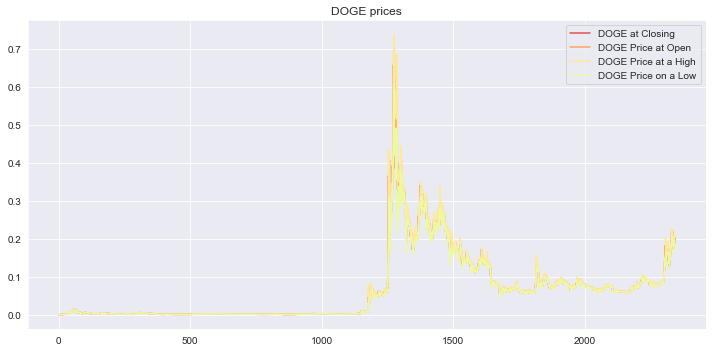

In [49]:
sns.color_palette("YlOrBr", as_cmap=True)
sns.set_style("darkgrid")

DOGE_USD["Close"].plot(label = 'DOGE at Closing', figsize = (10,5))
DOGE_USD["Open"].plot(label = 'DOGE Price at Open')
DOGE_USD["High"].plot(label = 'DOGE Price at a High')
DOGE_USD["Low"].plot(label = 'DOGE Price on a Low')
plt.legend()

plt.title('DOGE prices')
plt.show
plt.tight_layout()

### Exploratory Data Analysis of DOGE

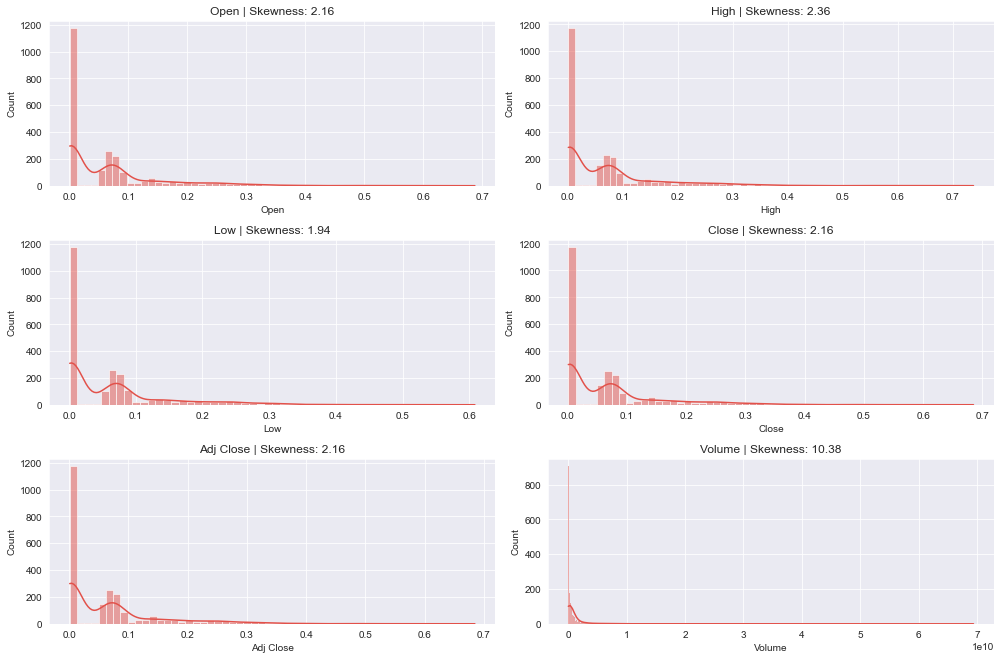

In [50]:
numerical_columns = DOGE_USD.select_dtypes(include=["int64", "float64"]).columns
 
# plots distrubition of each column
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(DOGE_USD[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(DOGE_USD[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()

## DOT Price Analysis, Performance, and Predictive Analytics

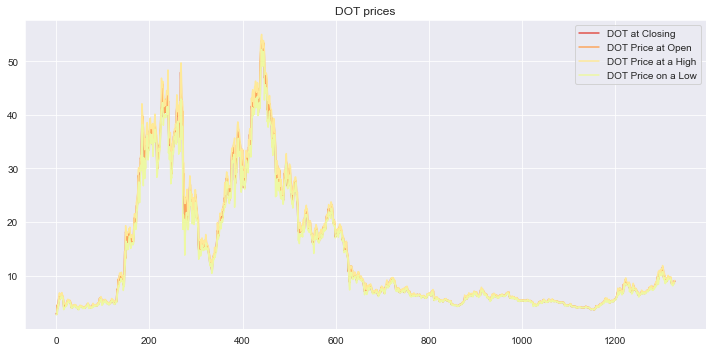

In [51]:
sns.color_palette("cubehelix", as_cmap=True)
sns.set_style("darkgrid")

DOT_USD["Close"].plot(label = 'DOT at Closing', figsize = (10,5))
DOT_USD["Open"].plot(label = 'DOT Price at Open')
DOT_USD["High"].plot(label = 'DOT Price at a High')
DOT_USD["Low"].plot(label = 'DOT Price on a Low')
plt.legend()

plt.title('DOT prices')
plt.show
plt.tight_layout()

### Exploratory Data Analysis of Polkadot

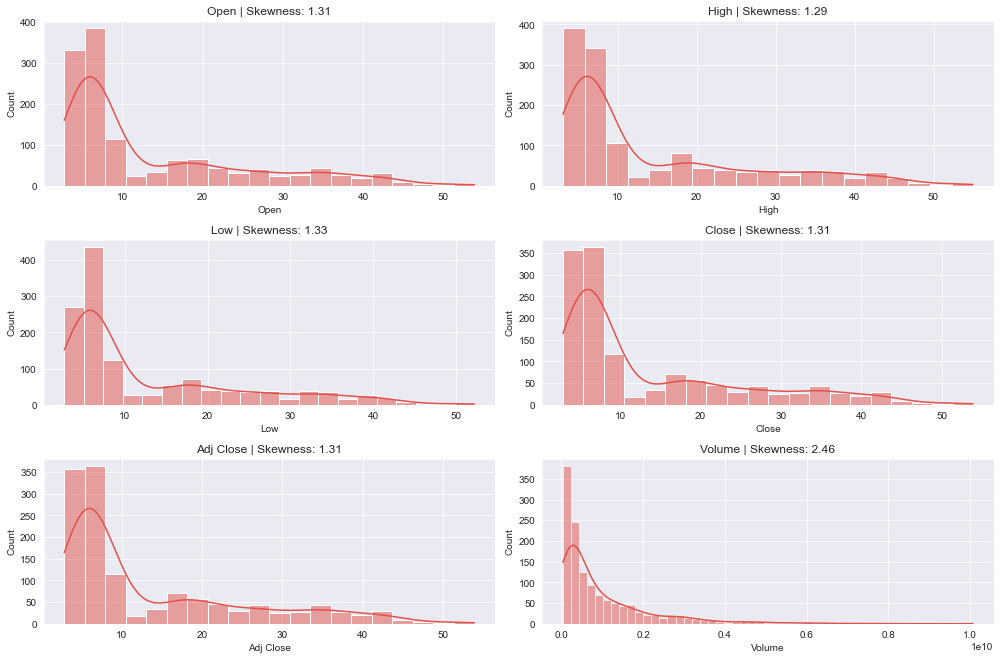

In [52]:
numerical_columns = DOT_USD.select_dtypes(include=["int64", "float64"]).columns
 
# plots distrubition of each column
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(DOT_USD[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(DOT_USD[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()

## ETH Price Analysis, Performance, and Predictive Analytics

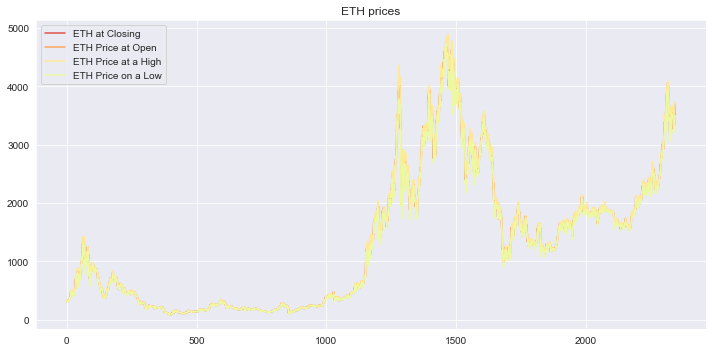

In [53]:
sns.color_palette("crest", as_cmap=True)
sns.set_style("darkgrid")

ETH_USD["Close"].plot(label = 'ETH at Closing', figsize = (10,5))
ETH_USD["Open"].plot(label = 'ETH Price at Open')
ETH_USD["High"].plot(label = 'ETH Price at a High')
ETH_USD["Low"].plot(label = 'ETH Price on a Low')
plt.legend()

plt.title('ETH prices')
plt.show
plt.tight_layout()

### Exploratory Data Analysis of ETH

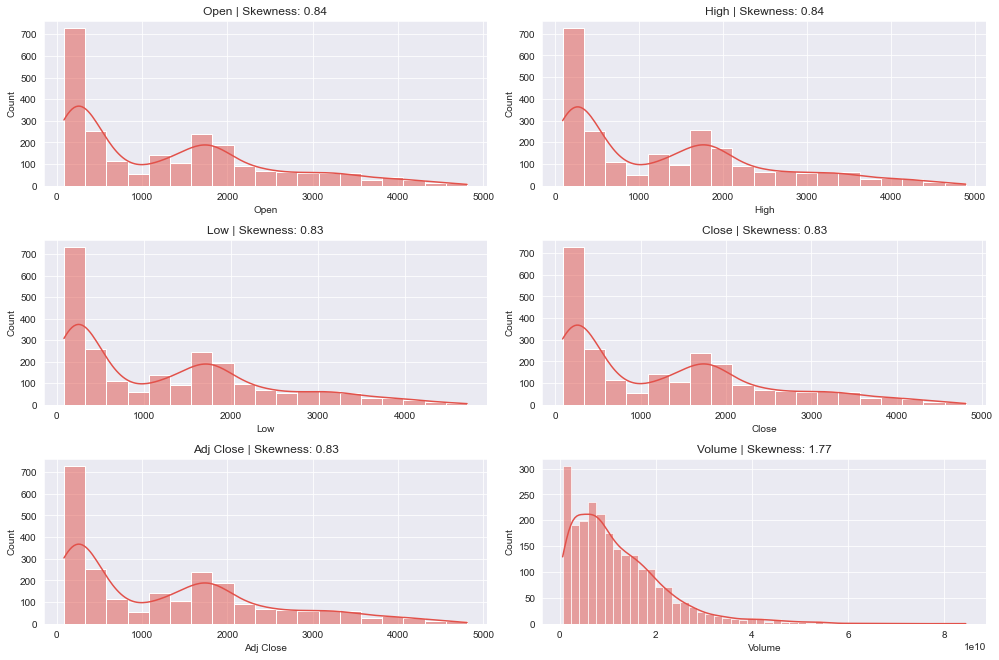

In [54]:
numerical_columns = ETH_USD.select_dtypes(include=["int64", "float64"]).columns
 
# plots distrubition of each column
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(ETH_USD[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(ETH_USD[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()

### Line chart of closing token price over time

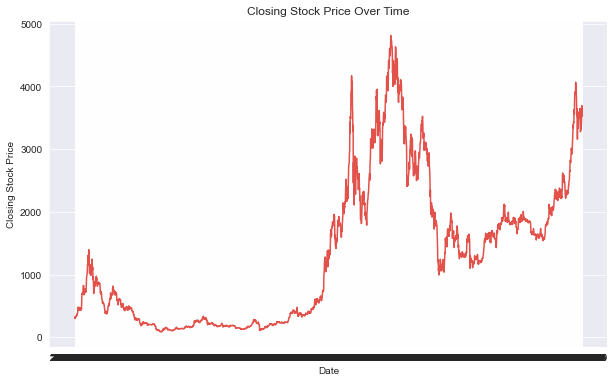

In [55]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=ETH_USD)
plt.title('Closing ETH Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

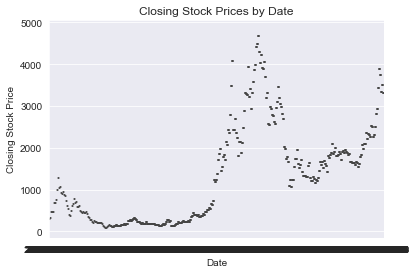

In [56]:
#ETH_USD['Year'] = ETH_USD['Date'].dt.year
sns.boxplot(x='Date', y='Close', data=ETH_USD)
plt.title('Closing Ethereum Prices by Date')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

## FET Price Analysis, Performance, and Predictive Analytics

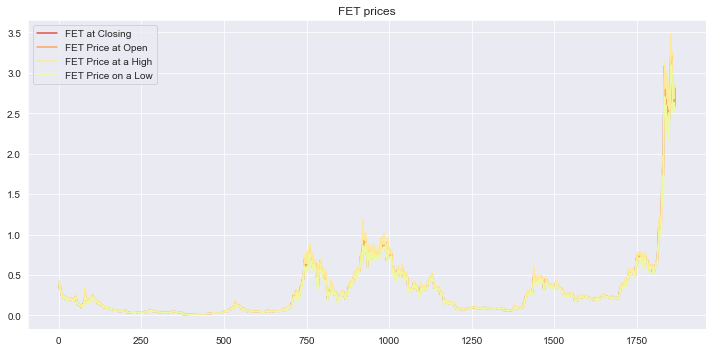

In [57]:
sns.color_palette("icefire", as_cmap=True)
sns.set_style("darkgrid")

FET_USD["Close"].plot(label = 'FET at Closing', figsize = (10,5))
FET_USD["Open"].plot(label = 'FET Price at Open')
FET_USD["High"].plot(label = 'FET Price at a High')
FET_USD["Low"].plot(label = 'FET Price on a Low')
plt.legend()

plt.title('FET prices')
plt.show
plt.tight_layout()

### Exploratory Data Analysis of FET

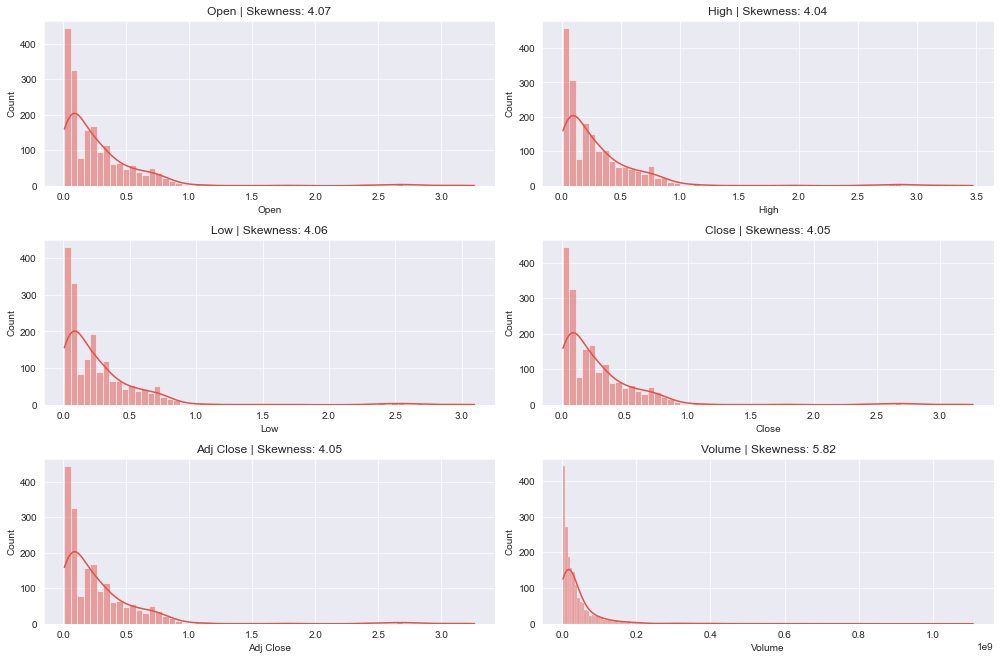

In [58]:
numerical_columns = FET_USD.select_dtypes(include=["int64", "float64"]).columns
 
# plots distrubition of each column
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(FET_USD[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(FET_USD[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()

## FIL Price Analysis, Performance, and Predictive Analytics

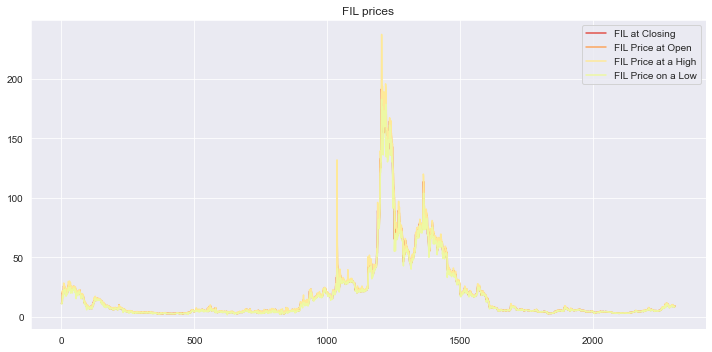

In [59]:
sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
sns.set_style("darkgrid")

FIL_USD["Close"].plot(label = 'FIL at Closing', figsize = (10,5))
FIL_USD["Open"].plot(label = 'FIL Price at Open')
FIL_USD["High"].plot(label = 'FIL Price at a High')
FIL_USD["Low"].plot(label = 'FIL Price on a Low')
plt.legend()

plt.title('FIL prices')
plt.show
plt.tight_layout()

### Exploratory Data Analysis of FIL

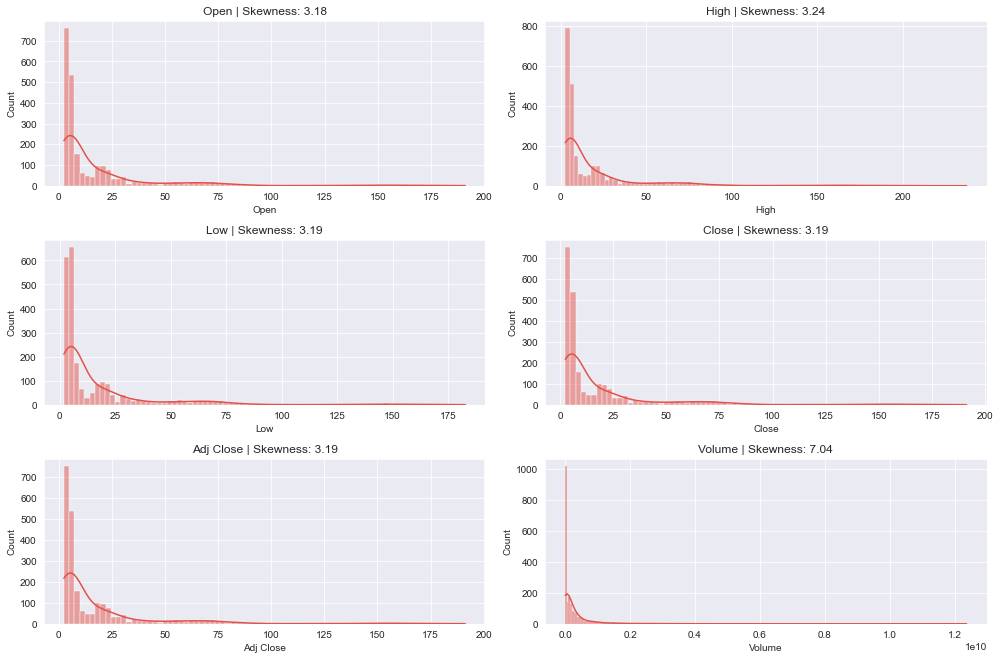

In [60]:
numerical_columns = FIL_USD.select_dtypes(include=["int64", "float64"]).columns
 
# plots distrubition of each column
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(FIL_USD[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(FIL_USD[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()

## KCS Price Analysis, Performance, and Predictive Analytics

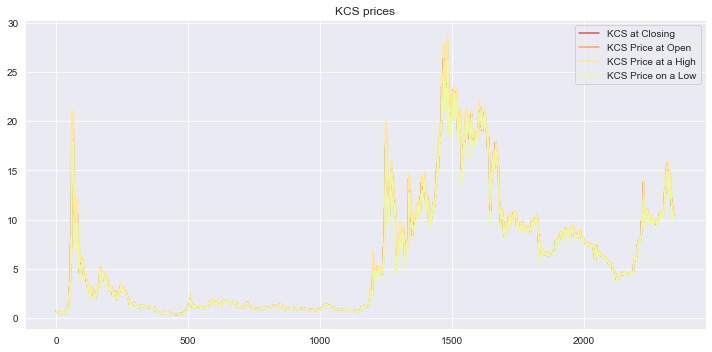

In [61]:
sns.diverging_palette(145, 300, s=60, as_cmap=True)
sns.set_style("darkgrid")

KCS_USD["Close"].plot(label = 'KCS at Closing', figsize = (10,5))
KCS_USD["Open"].plot(label = 'KCS Price at Open')
KCS_USD["High"].plot(label = 'KCS Price at a High')
KCS_USD["Low"].plot(label = 'KCS Price on a Low')
plt.legend()

plt.title('KCS prices')
plt.show
plt.tight_layout()

### Exploratory Data Analysis of KCS

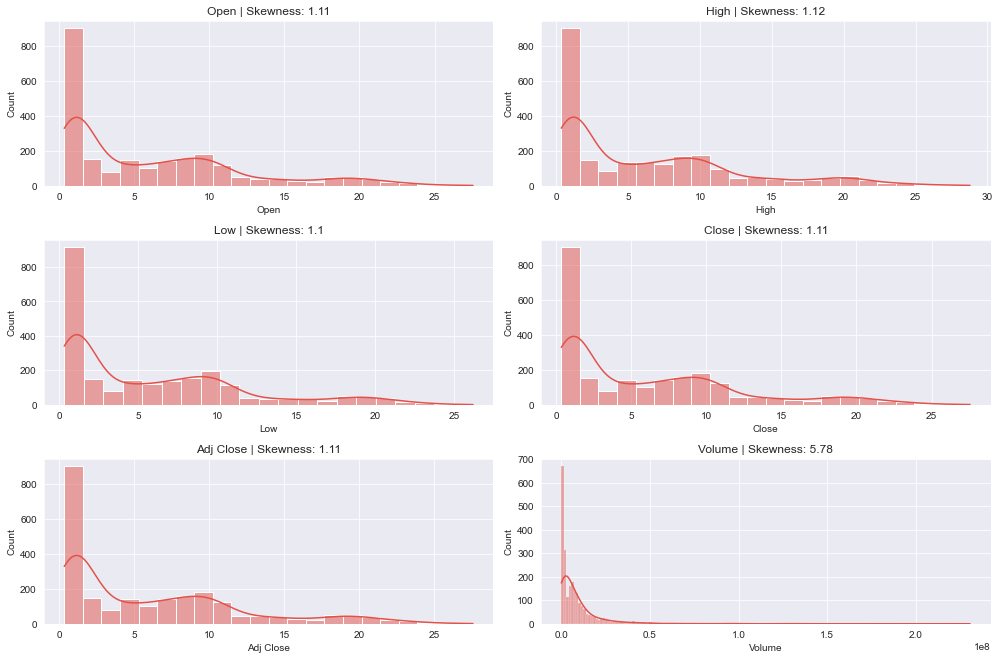

In [62]:
numerical_columns = KCS_USD.select_dtypes(include=["int64", "float64"]).columns
 
# plots distrubition of each column
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(KCS_USD[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(KCS_USD[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()

## LINK Price Analysis, Performance, and Predictive Analytics

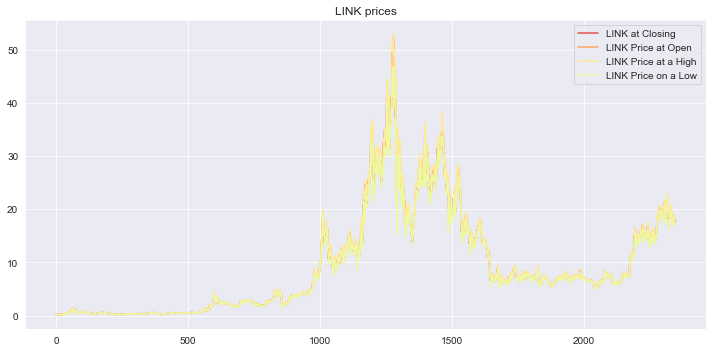

In [63]:
sns.color_palette("Blues", as_cmap=True)
sns.set_style("darkgrid")

LINK_USD["Close"].plot(label = 'LINK at Closing', figsize = (10,5))
LINK_USD["Open"].plot(label = 'LINK Price at Open')
LINK_USD["High"].plot(label = 'LINK Price at a High')
LINK_USD["Low"].plot(label = 'LINK Price on a Low')
plt.legend()

plt.title('LINK prices')
plt.show
plt.tight_layout()

### Exploratory Data Analysis of LINK

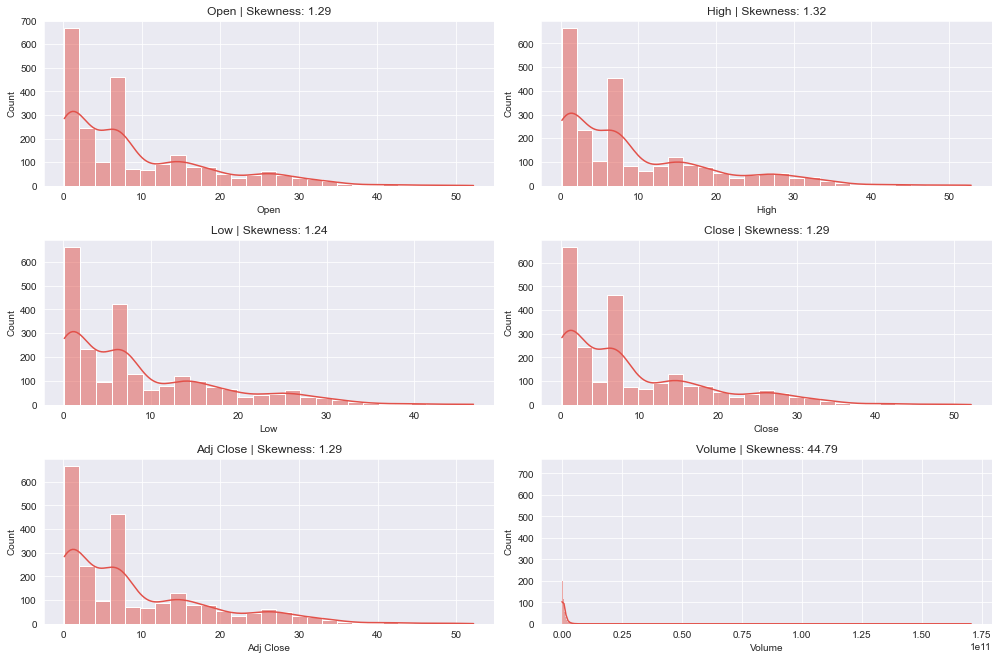

In [64]:
numerical_columns = LINK_USD.select_dtypes(include=["int64", "float64"]).columns
 
# plots distrubition of each column
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(LINK_USD[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(LINK_USD[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()

## LTC Price Analysis, Performance, and Predictive Analytics

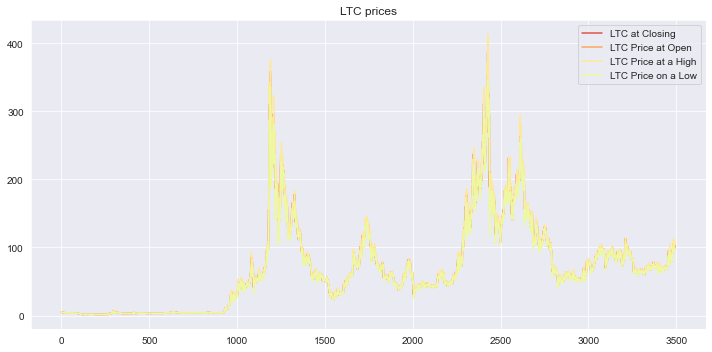

In [65]:
sns.color_palette("YlOrBr", as_cmap=True)
sns.set_style("darkgrid")

LTC_USD["Close"].plot(label = 'LTC at Closing', figsize = (10,5))
LTC_USD["Open"].plot(label = 'LTC Price at Open')
LTC_USD["High"].plot(label = 'LTC Price at a High')
LTC_USD["Low"].plot(label = 'LTC Price on a Low')
plt.legend()

plt.title('LTC prices')
plt.show
plt.tight_layout()

### Exploratory Data Analysis of LTC

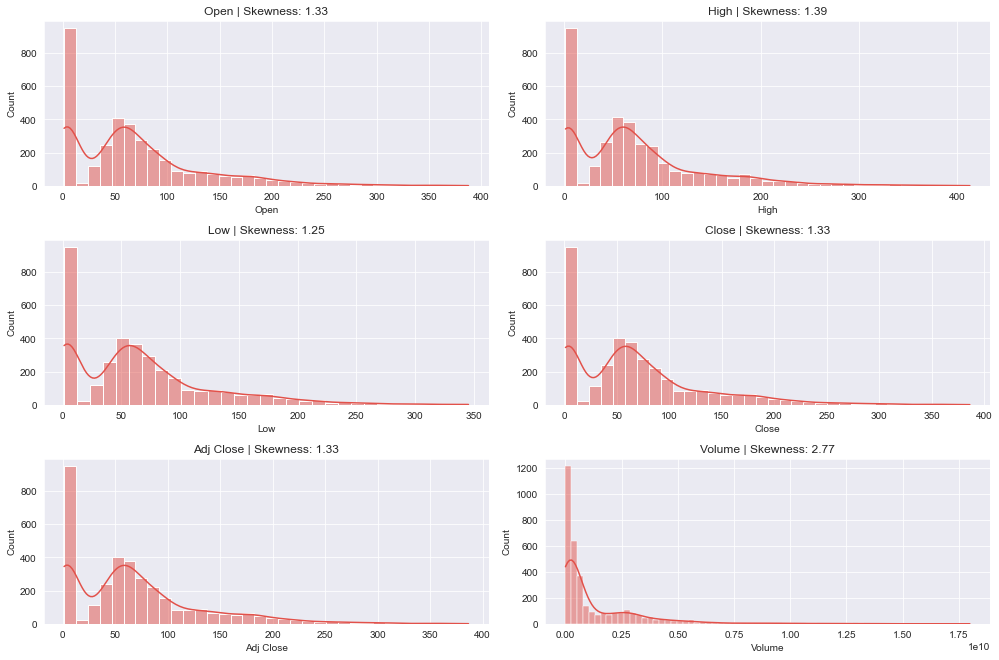

In [66]:
numerical_columns = LTC_USD.select_dtypes(include=["int64", "float64"]).columns
 
# plots distrubition of each column
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(LTC_USD[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(LTC_USD[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()

## OCEAN Price Analysis, Performance, and Predictive Analytics

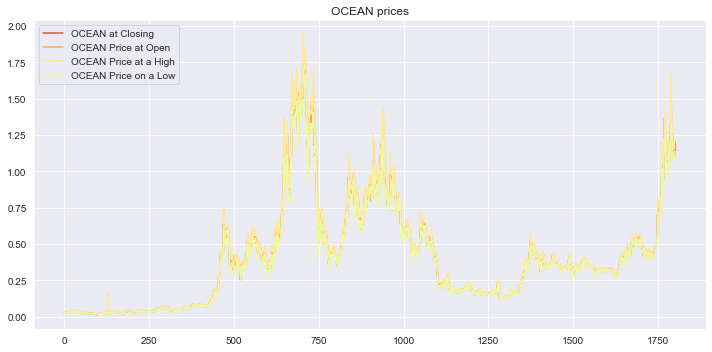

In [67]:
sns.color_palette("mako", as_cmap=True)
sns.set_style("darkgrid")

OCEAN_USD["Close"].plot(label = 'OCEAN at Closing', figsize = (10,5))
OCEAN_USD["Open"].plot(label = 'OCEAN Price at Open')
OCEAN_USD["High"].plot(label = 'OCEAN Price at a High')
OCEAN_USD["Low"].plot(label = 'OCEAN Price on a Low')
plt.legend()

plt.title('OCEAN prices')
plt.show
plt.tight_layout()

### Exploratory Data Analysis of OCEAN

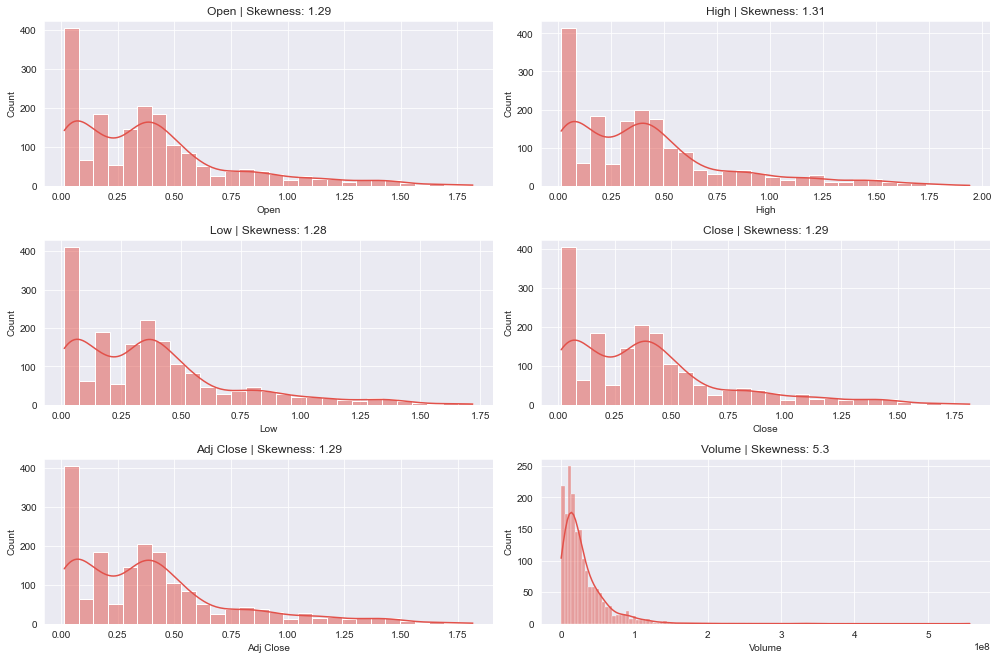

In [68]:
numerical_columns = OCEAN_USD.select_dtypes(include=["int64", "float64"]).columns
 
# plots distrubition of each column
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(OCEAN_USD[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(OCEAN_USD[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()

## ROSE Price Analysis, Performance, and Predictive Analytics

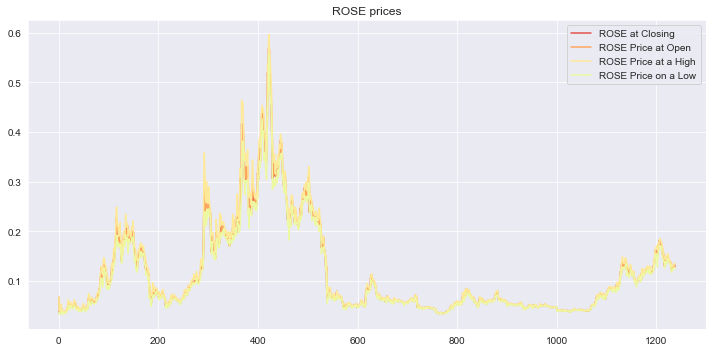

In [69]:
sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.set_style("darkgrid")

ROSE_USD["Close"].plot(label = 'ROSE at Closing', figsize = (10,5))
ROSE_USD["Open"].plot(label = 'ROSE Price at Open')
ROSE_USD["High"].plot(label = 'ROSE Price at a High')
ROSE_USD["Low"].plot(label = 'ROSE Price on a Low')
plt.legend()

plt.title('ROSE prices')
plt.show
plt.tight_layout()

### Exploratory Data Analysis of ROSE

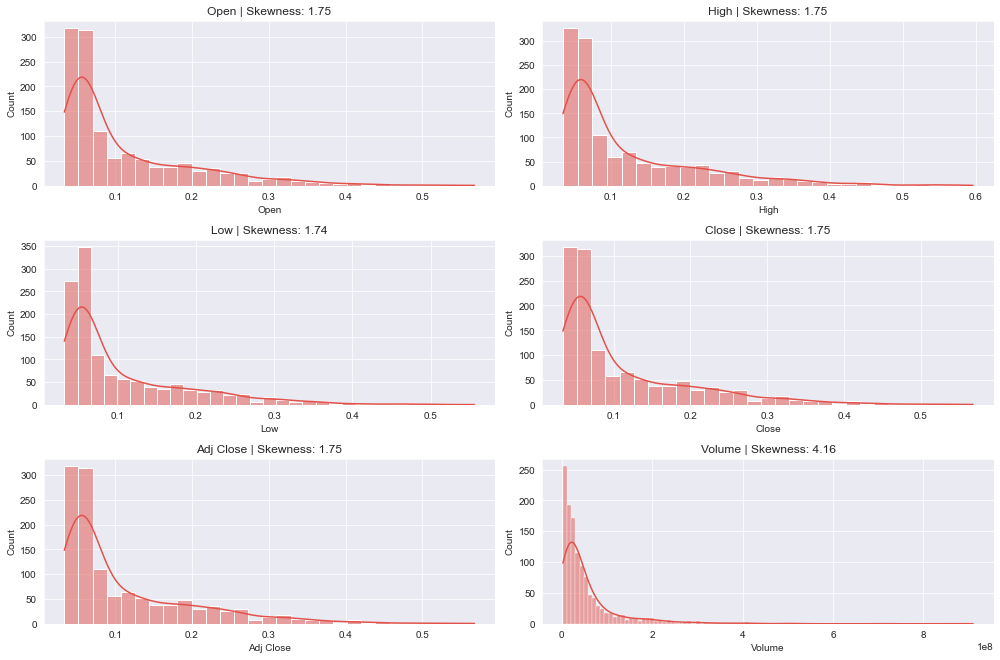

In [70]:
numerical_columns = ROSE_USD.select_dtypes(include=["int64", "float64"]).columns
 
# plots distrubition of each column
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(ROSE_USD[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(ROSE_USD[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()

## SOL Price Analysis, Performance, and Predictive Analytics

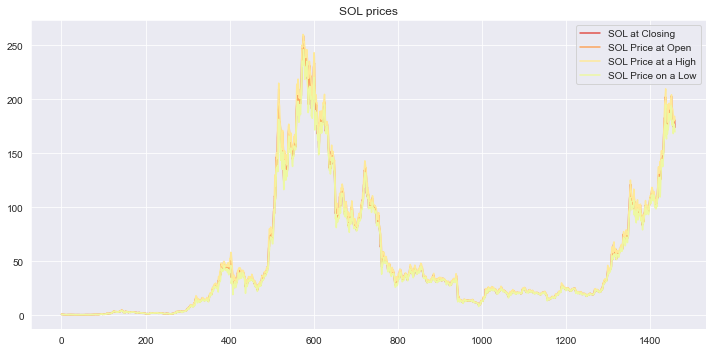

In [71]:
sns.cubehelix_palette(as_cmap=True)
sns.set_style("darkgrid")

SOL_USD["Close"].plot(label = 'SOL at Closing', figsize = (10,5))
SOL_USD["Open"].plot(label = 'SOL Price at Open')
SOL_USD["High"].plot(label = 'SOL Price at a High')
SOL_USD["Low"].plot(label = 'SOL Price on a Low')
plt.legend()

plt.title('SOL prices')
plt.show
plt.tight_layout()

### Exploratory Data Analysis of SOL

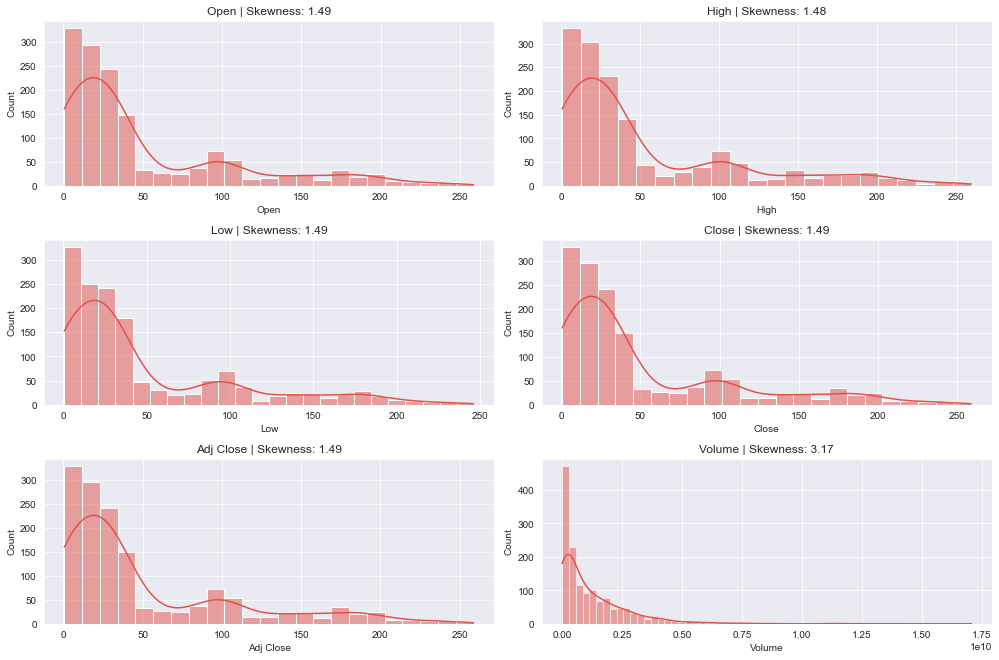

In [72]:
numerical_columns = SOL_USD.select_dtypes(include=["int64", "float64"]).columns
 
# plots distrubition of each column
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(SOL_USD[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(SOL_USD[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()

## UNI Price Analysis, Performance, and Predictive Analytics

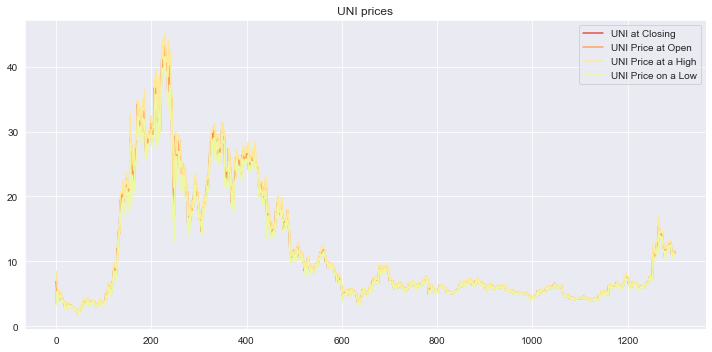

In [73]:
sns.color_palette("rocket_r", as_cmap=True)
sns.set_style("darkgrid")

UNI_USD["Close"].plot(label = 'UNI at Closing', figsize = (10,5))
UNI_USD["Open"].plot(label = 'UNI Price at Open')
UNI_USD["High"].plot(label = 'UNI Price at a High')
UNI_USD["Low"].plot(label = 'UNI Price on a Low')
plt.legend()

plt.title('UNI prices')
plt.show
plt.tight_layout()

### Exploratory Data Analysis of Uniswap

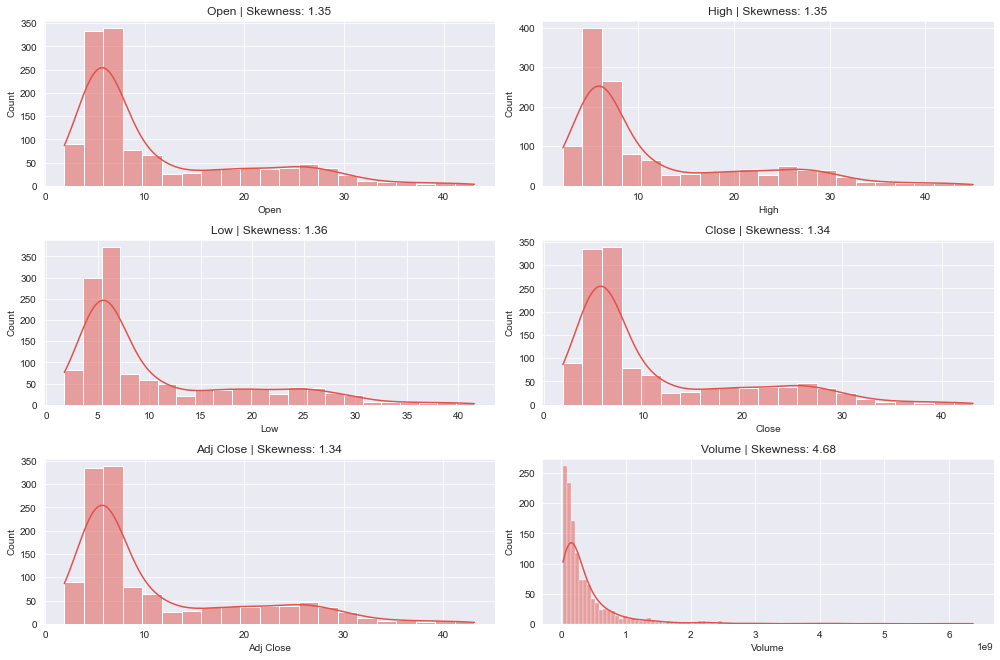

In [74]:
numerical_columns = UNI_USD.select_dtypes(include=["int64", "float64"]).columns
 
# plots distrubition of each column
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(UNI_USD[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(UNI_USD[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()

## XMR Price Analysis, Performance, and Predictive Analytics

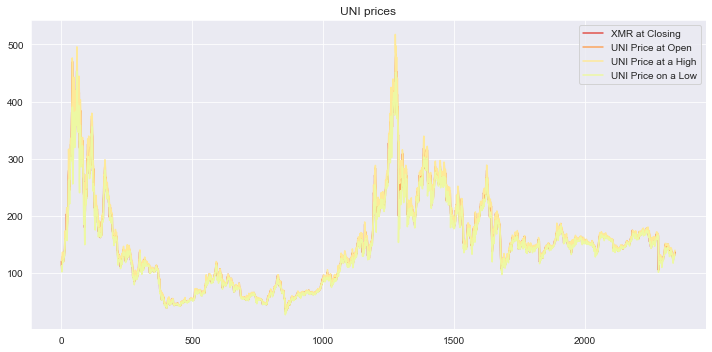

In [75]:
sns.color_palette("YlOrBr", as_cmap=True)
sns.set_style("darkgrid")

XMR_USD["Close"].plot(label = 'XMR at Closing', figsize = (10,5))
XMR_USD["Open"].plot(label = 'UNI Price at Open')
XMR_USD["High"].plot(label = 'UNI Price at a High')
XMR_USD["Low"].plot(label = 'UNI Price on a Low')
plt.legend()

plt.title('UNI prices')
plt.show
plt.tight_layout()

### Exploratory Data Analysis of Monero

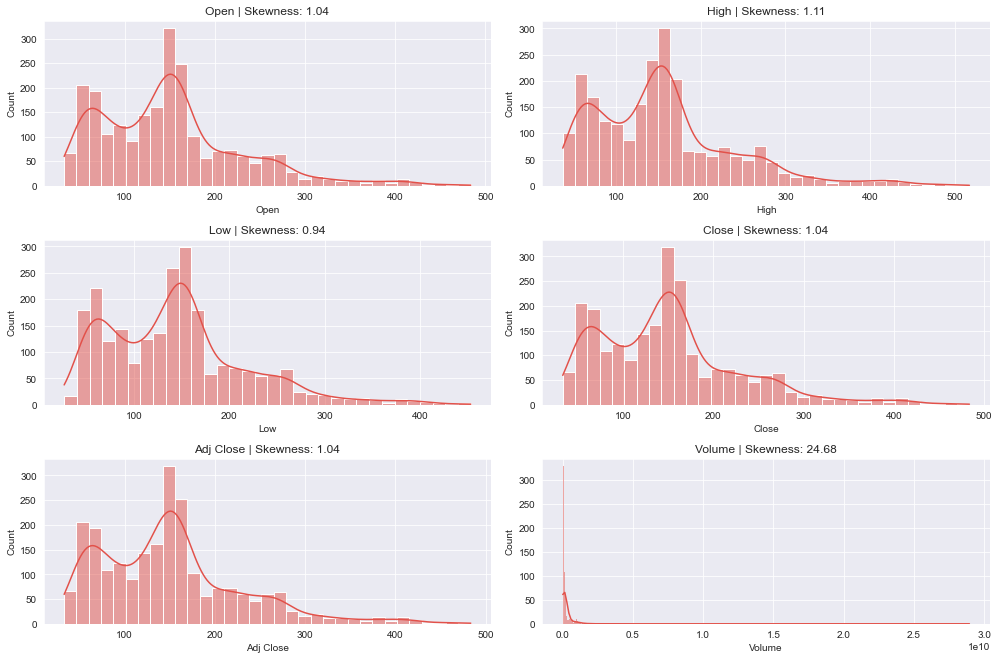

In [76]:
numerical_columns = XMR_USD.select_dtypes(include=["int64", "float64"]).columns
 
# plots distrubition of each column
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(XMR_USD[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(XMR_USD[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()

## XRP Price Analysis, Performance, and Predictive Analytics

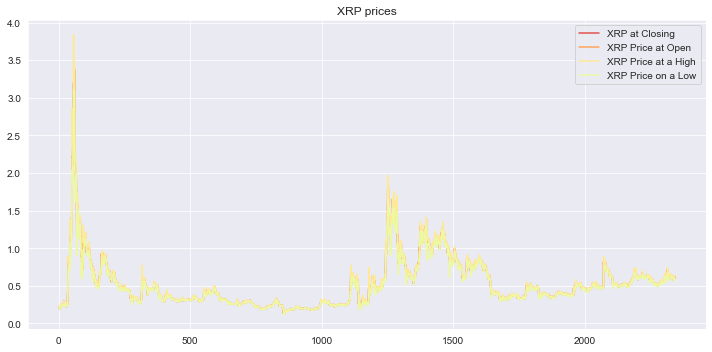

In [77]:
sns.color_palette("icefire", as_cmap=True)
sns.set_style("darkgrid")

XRP_USD["Close"].plot(label = 'XRP at Closing', figsize = (10,5))
XRP_USD["Open"].plot(label = 'XRP Price at Open')
XRP_USD["High"].plot(label = 'XRP Price at a High')
XRP_USD["Low"].plot(label = 'XRP Price on a Low')
plt.legend()

plt.title('XRP prices')
plt.show
plt.tight_layout()

### Exploratory Data Analysis of Ripple

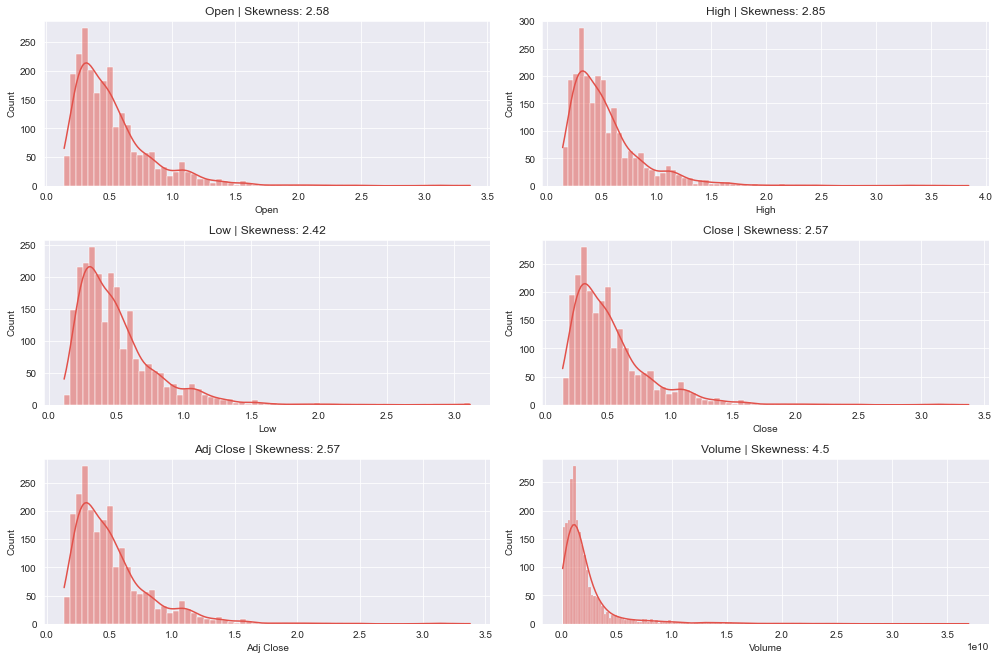

In [78]:
numerical_columns = XRP_USD.select_dtypes(include=["int64", "float64"]).columns
 
# plots distrubition of each column
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(XRP_USD[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(XRP_USD[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()

## XTZ Price Analysis, Performance, and Predictive Analytics

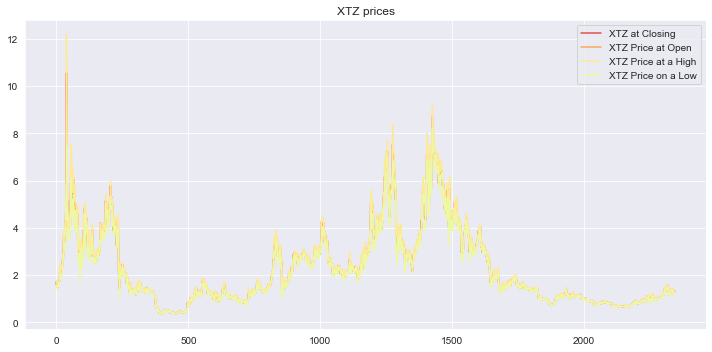

In [79]:
sns.color_palette("Blues", as_cmap=True)
sns.set_style("darkgrid")

XTZ_USD["Close"].plot(label = 'XTZ at Closing', figsize = (10,5))
XTZ_USD["Open"].plot(label = 'XTZ Price at Open')
XTZ_USD["High"].plot(label = 'XTZ Price at a High')
XTZ_USD["Low"].plot(label = 'XTZ Price on a Low')
plt.legend()

plt.title('XTZ prices')
plt.show
plt.tight_layout()

### Exploratory Data Analysis of Tezos

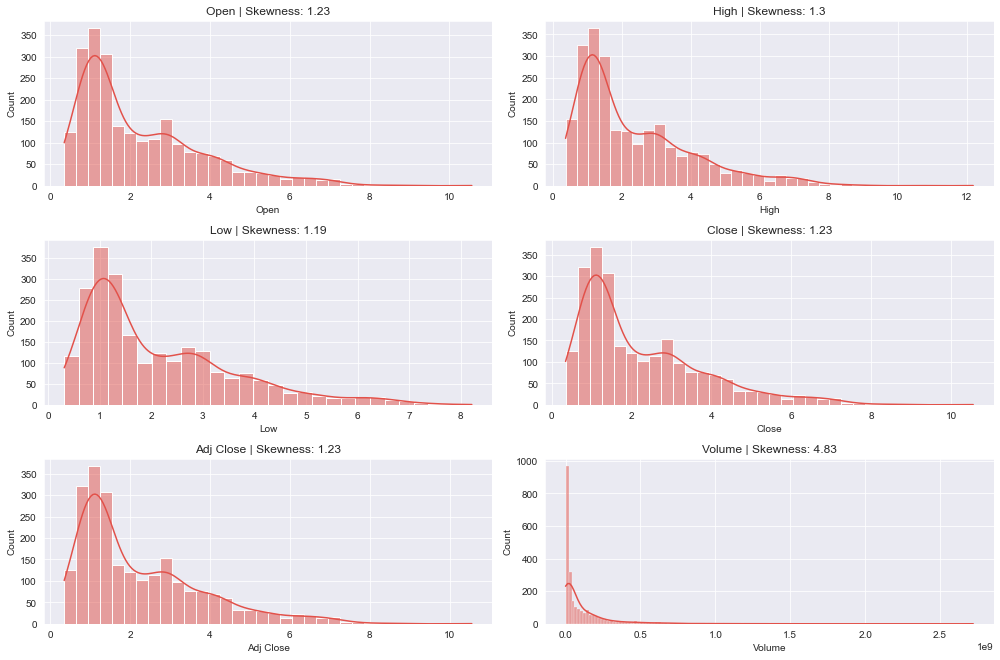

In [80]:
numerical_columns = XTZ_USD.select_dtypes(include=["int64", "float64"]).columns
 
# plots distrubition of each column
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(XTZ_USD[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(XTZ_USD[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()

In [83]:
sns.displot(data=XTZ_USD, kind="ecdf", x="Open", col="Date", rug=True)

ValueError: Image size of 843840x360 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 843840x360 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 843840x360 with 2344 Axes>

In [ ]:
sns.relplot(
    data=XTZ_USD, kind="line",
    x="Close", y="Date", col="Volume",
    hue="event", style="event",
)